# Artificial Intelligence and Machine Learning

## Unit II

## Perceptron and Logistic Regression

## My own latex definitions

$$\def\mbf#1{\mathbf{#1}}$$
$$\def\bmf#1{\boldsymbol{#1}}$$
$$\def\bx{\mbf{x}}$$
$$\def\bv{\mbf{v}}$$
$$\def\bz{\mbf{z}}$$
$$\def\bmu{\bmf{\mu}}$$
$$\def\bsigma{\bmf{\Sigma}}$$
$$\def\Rd#1{\in \mathbb{R}^{#1}}$$

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)


# Aux functions

def plot_grid(Xs, Ys, axs=None):
    ''' Aux function to plot a grid'''
    t = np.arange(Xs.size) # define progression of int for indexing colormap
    if axs:
        axs.plot(0, 0, marker='*', color='r', linestyle='none') #plot origin
        axs.scatter(Xs,Ys, c=t, cmap='jet', marker='.') # scatter x vs y
        axs.axis('scaled') # axis scaled
    else:
        plt.plot(0, 0, marker='*', color='r', linestyle='none') #plot origin
        plt.scatter(Xs,Ys, c=t, cmap='jet', marker='.') # scatter x vs y
        plt.axis('scaled') # axis scaled
        
def linear_map(A, Xs, Ys):
    '''Map src points with A'''
    # [NxN,NxN] -> NxNx2 # add 3-rd axis, like adding another layer
    src = np.stack((Xs,Ys), axis=Xs.ndim)
    # flatten first two dimension
    # (NN)x2
    src_r = src.reshape(-1,src.shape[-1]) #ask reshape to keep last dimension and adjust the rest
    # 2x2 @ 2x(NN)
    dst = A @ src_r.T # 2xNN
    #(NN)x2 and then reshape as NxNx2
    dst = (dst.T).reshape(src.shape)
    # Access X and Y
    return dst[...,0], dst[...,1]


def plot_points(ax, Xs, Ys, col='red', unit=None, linestyle='solid'):
    '''Plots points'''
    ax.set_aspect('equal')
    ax.grid(True, which='both')
    ax.axhline(y=0, color='gray', linestyle="--")
    ax.axvline(x=0, color='gray',  linestyle="--")
    ax.plot(Xs, Ys, color=col)
    if unit is None:
        plotVectors(ax, [[0,1],[1,0]], ['gray']*2, alpha=1, linestyle=linestyle)
    else:
        plotVectors(ax, unit, [col]*2, alpha=1, linestyle=linestyle)

def plotVectors(ax, vecs, cols, alpha=1, linestyle='solid'):
    '''Plot set of vectors.'''
    for i in range(len(vecs)):
        x = np.concatenate([[0,0], vecs[i]])
        ax.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha, linestyle=linestyle, linewidth=2)

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)


# Aux functions

def plot_grid(Xs, Ys, axs=None):
    ''' Aux function to plot a grid'''
    t = np.arange(Xs.size) # define progression of int for indexing colormap
    if axs:
        axs.plot(0, 0, marker='*', color='r', linestyle='none') #plot origin
        axs.scatter(Xs,Ys, c=t, cmap='jet', marker='.') # scatter x vs y
        axs.axis('scaled') # axis scaled
    else:
        plt.plot(0, 0, marker='*', color='r', linestyle='none') #plot origin
        plt.scatter(Xs,Ys, c=t, cmap='jet', marker='.') # scatter x vs y
        plt.axis('scaled') # axis scaled
        
def linear_map(A, Xs, Ys):
    '''Map src points with A'''
    # [NxN,NxN] -> NxNx2 # add 3-rd axis, like adding another layer
    src = np.stack((Xs,Ys), axis=Xs.ndim)
    # flatten first two dimension
    # (NN)x2
    src_r = src.reshape(-1,src.shape[-1]) #ask reshape to keep last dimension and adjust the rest
    # 2x2 @ 2x(NN)
    dst = A @ src_r.T # 2xNN
    #(NN)x2 and then reshape as NxNx2
    dst = (dst.T).reshape(src.shape)
    # Access X and Y
    return dst[...,0], dst[...,1]


def plot_points(ax, Xs, Ys, col='red', unit=None, linestyle='solid'):
    '''Plots points'''
    ax.set_aspect('equal')
    ax.grid(True, which='both')
    ax.axhline(y=0, color='gray', linestyle="--")
    ax.axvline(x=0, color='gray',  linestyle="--")
    ax.plot(Xs, Ys, color=col)
    if unit is None:
        plotVectors(ax, [[0,1],[1,0]], ['gray']*2, alpha=1, linestyle=linestyle)
    else:
        plotVectors(ax, unit, [col]*2, alpha=1, linestyle=linestyle)

def plotVectors(ax, vecs, cols, alpha=1, linestyle='solid'):
    '''Plot set of vectors.'''
    for i in range(len(vecs)):
        x = np.concatenate([[0,0], vecs[i]])
        ax.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha, linestyle=linestyle, linewidth=2)

# Yet Another Text Book


<center><img src="figs/math_book.png" width='30%' ></center>

# Today's lecture
## Supervised, <ins>Parametric</ins> Models
#### Propaedeutic part for Deep Learning


### 1) The Perceptron Algorithm
### 2) Logistic Regression

## ℹ️ Where we are now


| Topic                | Hours       | 
| :-------------:      |:-------------:
| Intro, Math Recap    | -
|          **Unsupervised Learning**      |
| Dimensionality Reduction (PCA, Eigenvectors, SVD) | - |
|   Clustering  (kmeans, GMM)       | -           |
|          **Supervised Learning, Non-parametric**      |
| Nearest Neighbours | - |
| Decision trees | - |
|          **Supervised Learning, Parametric**      |
| Linear Regression with Least Squares | - |
| Polynomial regression, under/overfitting | - |
| ~~Kernel Methods and SVM~~ | - |
| $\star$ Perceptron, Logistic Regression (LR) | - |
| **Deep Learning** |
| $\star$ Perceptron, Logistic Regression (LR) from LR to Neural Nets | - |
| **Total** | 60 |

# This lecture material is taken from

- [Mostly from Stanford Note](http://cs229.stanford.edu/summer2019/cs229-notes1.pdf)
- [Mostly from Stanford class](https://www.youtube.com/watch?v=WViuTuAOPlM)
- [Bishop - Chapter 4 - Section 4.3.2 page 205 (not very well explained)](#)
- [Tibshirani - Chapter 4 - Section 4.4 page 119](#)

# The Perceptron Algorithm

# The Perceptron Algorithm

- We study this algorithm mostly for **historical importance and didactic duty**
- Nowadays it is not practically used anymore.
- Very loosely inspired by the concept of **neurons** (that backed the whole idea of Neural Nets)
- I do not like the word "Neural", creates false belief/hype



<center><img src="https://cdn-images-1.medium.com/max/1000/1*mzWqY5snL5pYrKo7r5-HZg.png" width='40%'/><center/>

_[“Principles of Neurodynamics: Perceptrons and the Theory of Brain Mechanisms” published in 1962](https://safari.ethz.ch/digitaltechnik/spring2019/lib/exe/fetch.php?media=neurodynamics1962rosenblatt.pdf)_

# The Perceptron Algorithm

<center><img src="figs/perceptron.png" width='50%'/><center/>

# The Perceptron Algorithm

$\mbf{x}_i \in \mathbb{R}^d$ and $y \in \{0,1\}$

$$f_{\boldsymbol{\theta}}(\mbf{x}) \doteq \sigma\left(  \bmf{\theta}^T\mbf{x} \right)$$

where:

$$ \sigma(z)= \begin{cases} +1, & if& z\ge0 \\ 
0, & if & z<0\end{cases}$$
<br><br>


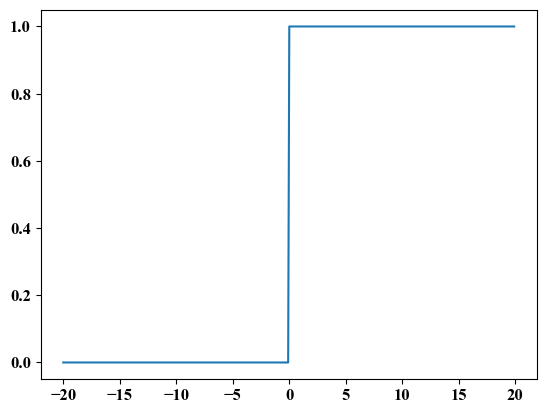

In [12]:
import numpy as np;import matplotlib.pyplot as plt;x = np.arange(-20.0, 20.0, 0.1);y = np.maximum(np.sign(x),0);_=plt.plot(x,y)

# Observations

A few observations:
- The magnitude of the dot product $\bmf{\theta}^T\mbf{x}$ does not matter. What matters is the **sign of the dot product**.
- $\bmf{\theta}^T\mbf{x} > 0$ when this condition is geometrically satisfied? The angle between $\bmf{\theta},\mbf{x}$ is **less** than $90$ degree.


<center><img src="figs/Slide52.png" width='50%'/><center/>

# Observations

A few observations:
- The magnitude of the dot product $\bmf{\theta}^T\mbf{x}$ does not matter. What matters is the **sign of the dot product**.
- $\bmf{\theta}^T\mbf{x} > 0$ when this condition is geometrically satisfied? The angle between $\bmf{\theta},\mbf{x}$ is **less** than $90$ degree.
- $\bmf{\theta}^T\mbf{x} < 0$ when this condition is geometrically satisfied? The angle between $\bmf{\theta},\mbf{x}$ is **more** than $90$ degree.


<center><img src="figs/Slide52.png" width='50%'/><center/>

# Observations

A few observations:
- The magnitude of the dot product $\bmf{\theta}^T\mbf{x}$ does not matter. What matters is the **sign of the dot product**.
- $\bmf{\theta}^T\mbf{x} > 0$ when this condition is geometrically satisfied? The angle between $\bmf{\theta},\mbf{x}$ is **less** than $90$ degree.
- $\bmf{\theta}^T\mbf{x} < 0$ when this condition is geometrically satisfied? The angle between $\bmf{\theta},\mbf{x}$ is **more** than $90$ degree.
- $\bmf{\theta}^T\mbf{x} = 0$ when this condition is geometrically satisfied? The angle between $\bmf{\theta},\mbf{x}$ is **exactly** $90$ degree (decision boundary).


<center><img src="figs/Slide52.png" width='50%'/><center/>

# Learning the Perceptron

<center><img src="figs/Slide52.png" width='50%'/><center/>

# Learning the Perceptron

<center><img src="figs/Slide53.png" width='50%'/><center/>

# Learning the Perceptron

<center><img src="figs/Slide54.png" width='50%'/><center/>

# Learning the Perceptron

<center><img src="figs/Slide55.png" width='50%'/><center/>

# Learning the Perceptron

<center><img src="figs/Slide56.png" width='50%'/><center/>

# Learning the Perceptron

<center><img src="figs/Slide57.png" width='50%'/><center/>

# Key Observation


- if the **misclassified** point is **negative** ($y=0$) `the angle is less than 90 deg`, change $\theta \leftarrow \theta-\gamma\mbf{x}$
- if the **misclassified** point is **positive** ($y=1$) `the angle is more than 90 deg`,  change $\theta \leftarrow  \theta+\gamma\mbf{x}$

$$ \theta^T\mbf{x} \le (\theta+\gamma\mbf{x})^T\mbf{x} = \theta^T\mbf{x} + \underbrace{\gamma\mbf{x}^T\mbf{x}}_{\text{always positive}}$$

<center><img src="figs/perceptron_angle_1.png" width='30%'/><center/>

# Key Observation


- if the **misclassified** point is **negative** ($y=0$) `the angle is less than 90 deg`, change $\theta \leftarrow \theta-\gamma\mbf{x}$
- if the **misclassified** point is **positive** ($y=+1$) `the angle is more than 90 deg`,  change $\theta \leftarrow  \theta+\gamma\mbf{x}$

$$ \theta^T\mbf{x} \le (\theta+\gamma\mbf{x})^T\mbf{x} = \theta^T\mbf{x} + \underbrace{\gamma\mbf{x}^T\mbf{x}}_{\text{always positive}}$$

<center><img src="figs/perceptron_angle_2.png" width='30%'/><center/>

# Key Observation


- if the **misclassified** point is **negative** ($y=0$) `the angle is less than 90 deg`, change $\theta \leftarrow \theta-\gamma\mbf{x}$
- if the **misclassified** point is **positive** ($y=+1$) `the angle is more than 90 deg`,  change $\theta \leftarrow  \theta+\gamma\mbf{x}$

$$ \theta^T\mbf{x} \le (\theta+\gamma\mbf{x})^T\mbf{x} = \theta^T\mbf{x} + \underbrace{\gamma\mbf{x}^T\mbf{x}}_{\text{always positive}}$$

<center><img src="figs/perceptron_angle_3.png" width='30%'/><center/>

# Learning the Perceptron

1. **Initialization - Set all params to zero** 
$$\bmf{\theta} \doteq \mbf{0}^T$$ Set it to all zeros or random initialization from a distribution.
2. Repeat until **convergence**:
     $$\bmf{\theta} \leftarrow  \bmf{\theta} -\gamma \left(\sigma(\mbf{\theta}^T\mbf{x})-y\right)\mbf{x}$$ OR
     $$\bmf{\theta} \leftarrow  \bmf{\theta} +\gamma \left(y - \sigma(\mbf{\theta}^T\mbf{x})\right)\mbf{x}$$
3. When convergence is reached, you final estimate is in $\bmf{\theta}$

# Perceptron Update Rule: $\bmf{\theta} \leftarrow  \bmf{\theta} +\gamma \left(y - \sigma(\mbf{\theta}^T\mbf{x})\right)\mbf{x}$


- In the correct case (both negative and positive point), $\bmf{\theta} \leftarrow  \bmf{\theta}$ is kept the same.
- Given $(\mbf{x}, y=1)$ but $\sigma\left(\mbf{\theta}^T\mbf{x}\right)=0$ then update $\theta$ with a bit of $+\mbf{x}$. (add a bit of $x$ to $\theta$).
- Given $(\mbf{x}, y=0)$ but $\sigma\left(\mbf{\theta}^T\mbf{x}\right)=1$ then update $\theta$ with a bit of $-\mbf{x}$. (subtract a bit of $x$ to $\theta$).

$\theta$ is a linear combination of training samples $\{\mbf{x}_i,y_i\}$

# Theory: 

Given a linearly separable training set, the **Perceptron** will find a generic solution of the infinite many that classifies correctly all the points (separate all the points neatly).

1. It will converge (convergence speed will depend on the `margin` between points). Small margins require more time to converge.
2. A non-optimal solution is guaranteed to be found.

# Perceptron cannot learn XOR logic function

<center><img src="figs/perceptron_no_xor.png" width='50%'/><center/>

In [21]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

lift_features = True

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = X[:, 0] ^ X[:, 1]

if lift_features:
    print('X before=',X, sep='\n')
    X = PolynomialFeatures(interaction_only=True).fit_transform(X).astype(int)
    print('X before=',X,y.T, sep='\n')
clf = Perceptron(fit_intercept=False, max_iter=10, tol=None,
                 shuffle=False).fit(X, y)
clf.predict(X)
clf.score(X, y)

X before=
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
X before=
[[1 0 0 0]
 [1 0 1 0]
 [1 1 0 0]
 [1 1 1 1]]
[0 1 1 0]


1.0

In [22]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, random_state=0, class_sep=2.8)


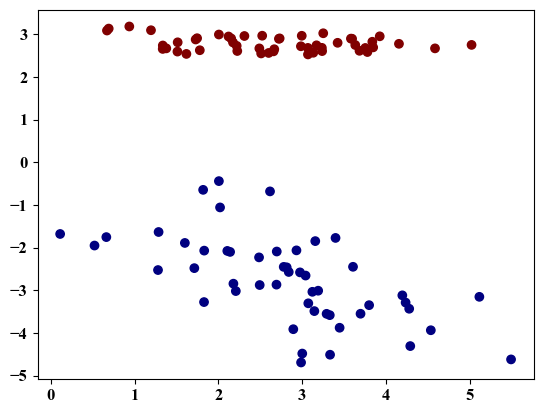

In [23]:
plt.scatter(*X.T,c=y,cmap='jet');

# Awesome demo coming up

ValueError: shapes (1,3) and (4,100) not aligned: 3 (dim 1) != 4 (dim 0)

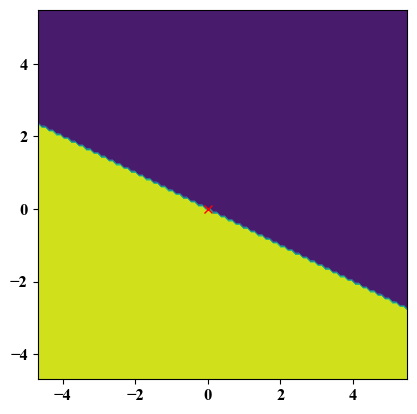

In [25]:
from sklearn.datasets import make_classification
from matplotlib import cm
from celluloid import Camera
from IPython.display import HTML

def get_support(minx, maxx):
    support = np.linspace(minx, maxx, 100)
    xx, yy = np.meshgrid(support, support)
    points = np.stack((xx.flatten(), yy.flatten()), axis=1)
    points = add_ones(points)
    return points, xx, yy

def plot_separating_plane(w, minx, maxx, points, xx, yy):
    dist = perceptron(w, points.T)
    dist = dist.reshape(xx.shape)
    plt.contourf(xx, yy, dist)
    plt.plot(0, 0, 'rx')
    plt.axis('scaled')
    plt.xlim(minx, maxx)


def perceptron(w, xi):
    return np.maximum(np.sign(np.dot(w, xi)), 0)


def add_ones(X):
    bias = np.ones((X.shape[0], 1))
    X = np.hstack((X, bias))
    return X

def done(w, X):
    return np.all(y == perceptron(w, X.T))


def plot_classification(theta_curr, minx, maxx, support, xx, yy, X):
    plot_separating_plane(theta_curr, minx, maxx, support, xx, yy)
    plt.scatter(X[:, 0], X[:, 1], s=80,c=y,
            facecolors="none",
            zorder=10,
            edgecolors="k",
            cmap=cm.get_cmap("RdBu"))

### CAMERA ##########
fig = plt.figure()
camera = Camera(fig)

################## DATA #####################
#X, y = make_classification(
#    n_features=2, n_redundant=0, n_informative=2, 
#    n_clusters_per_class=1, 
#    random_state=0, class_sep=2.8)
minx, maxx = X.min(), X.max()
support, xx, yy = get_support(minx, maxx)
X = add_ones(X)
############### PARAMS ########################
theta_curr = np.array([[-1, -2, 0]])
gamma = 1e-2
i = 0
text_kwargs = dict(ha='center', va='center', fontsize=10, color='C1')
################################################
plot_separating_plane(theta_curr, minx, maxx, support, xx, yy)
exit = False
# while not all are classified
while not done(theta_curr,X) and i < 300:
    # for all points
    for xi, yi in zip(X, y):
        prediction = perceptron(theta_curr, xi)
        # if prediction is wrong, update
        if prediction != yi:
            diff = yi - perceptron(theta_curr, xi)
            theta_curr = theta_curr + gamma * diff * xi
            plot_classification(theta_curr, minx, maxx, support, xx, yy, X)
            i += 1
            plt.text(-4, 4.5, str(i), **text_kwargs)
            camera.snap()
# write 20 frames with the last result for memory
for i in range(20):
    plot_classification(theta_curr, minx, maxx, support, xx, yy, X)
    camera.snap()
animation = camera.animate()
HTML(animation.to_html5_video())

# Perceptron Weakness

- It loops forever if the data is **NOT** linearly separable
- Even if the data is linearly separable, it may take an amount of time that is **infeasible** in practice to use it
- Does not converge to an optimal solution such as SVM, but it just returns a generic separating hyper-plane

# Perceptron History

<center><img src='figs/perceptron_history.png' width="60%"></center>

# Logistic Regression

# Logistic Regression

- The name is a bit _misleading_: it is used as a **discriminative <ins>classifier<ins>**
- Discriminative means we model $p(y|x)$ _what is the probability for the label $\operatorname{prob}(Y=y)$ given $x$?_
- Very commonly used algorithm

# Logistic Regression

- $\mbf{x} \in \mathbb{R}^d \quad y \in \{0,1\}$

$$ \begin{cases}
y=1  \quad \text{positive example}\\
y=0 \quad \text{negative example}\\
\end{cases} $$

# Logistic Regression (also called Logit)


$$f_{\boldsymbol{\theta}}(\mbf{x}) \doteq \sigma\left(  \bmf{\theta}^T\mbf{x} \right)$$

where:

$$ \sigma(z)= \frac{1}{1+\exp^{-z}} \quad \text{sigmoid or logistic function}$$
<br><br> <center>Smooth and Differentiable alternative to sign</center>

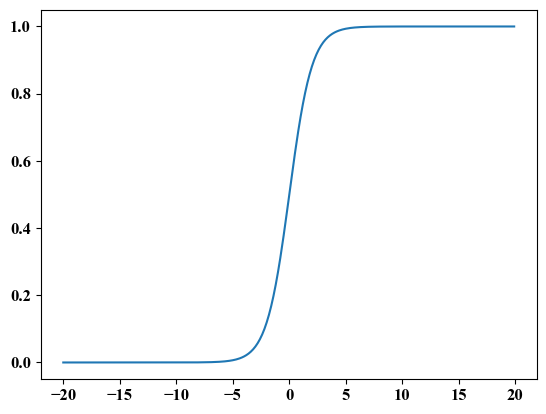

In [26]:
import numpy as np;import matplotlib.pyplot as plt;x = np.arange(-20.0, 20.0, 0.1);y = 1/(1+np.exp(-x));_=plt.plot(x,y)

# Logistic Regression - Probabilistic View

We model **conditional probability of $y|x$:**

$$ \begin{cases}
p(y=1| \mbf{x};\bmf{\theta}) = f_{\boldsymbol{\theta}}\\
p(y=0| \mbf{x};\bmf{\theta}) = ?\\
\end{cases} $$

<br><br>
$$f_{\boldsymbol{\theta}}(\mbf{x}) \doteq \sigma\left(  \bmf{\theta}^T\mbf{x} \right)$$

where:

$$ \sigma(z)= \frac{1}{1+\exp^{-z}} \quad \text{sigmoid or logistic function}$$


# Logistic Regression - Probabilistic View

We model **conditional probability of $y|x$:**

$$ \begin{cases}
p(y=1| \mbf{x};\bmf{\theta}) = f_{\boldsymbol{\theta}}\\
p(y=0| \mbf{x};\bmf{\theta}) = 1- f_{\boldsymbol{\theta}}\
\end{cases} $$

<br><br>
$$f_{\boldsymbol{\theta}}(\mbf{x}) \doteq \sigma\left(  \bmf{\theta}^T\mbf{x} \right)$$

where:

$$ \sigma(z)= \frac{1}{1+\exp^{-z}} \quad \text{sigmoid or logistic function}$$

$$\lim_{z\mapsto \infty}\sigma(z)=1$$
$$\lim_{z\mapsto -\infty}\sigma(z)=0$$

# Logistic Regression - Probabilistic View

We model **conditional probability of $y|x$:**

$$ \begin{cases}
p(y=1| \mbf{x};\bmf{\theta}) = f_{\boldsymbol{\theta}}\\
p(y=0| \mbf{x};\bmf{\theta}) = 1- f_{\boldsymbol{\theta}}\
\end{cases} $$

<br><br>
$$f_{\boldsymbol{\theta}}(\mbf{x}) \doteq \frac{1}{1+\exp^{-\bmf{\theta}^T\mbf{x}}}$$


# How changing $\mathbf{w}$ changes the output of the function

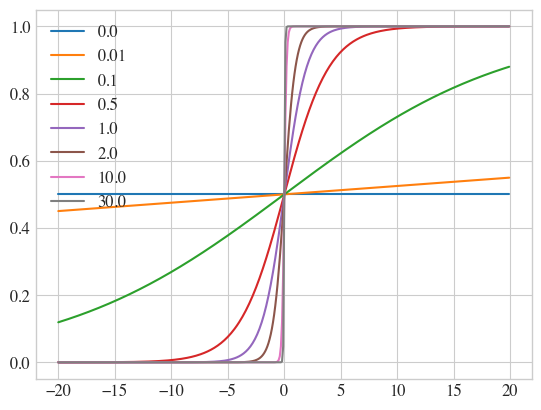

In [25]:
import numpy as np;
import matplotlib.pyplot as plt;
x = np.arange(-20.0, 20.0, 0.1);
ws = np.array([0, 0.01,0.1,0.5,1,2,10,30])
for w in ws:
    y = 1/(1+np.exp(-w*x));
    plt.plot(x,y);
plt.legend(ws);

# How changing $\mathbf{w}$ changes the output of the function

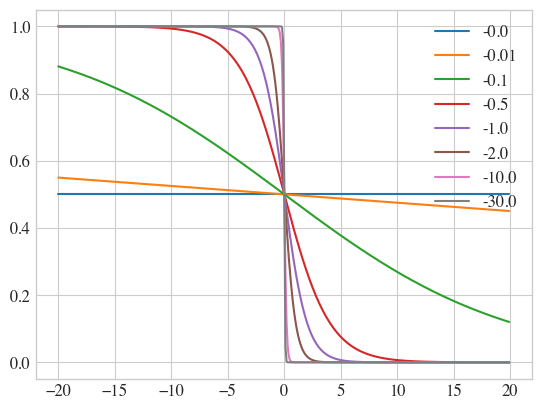

In [26]:
import numpy as np;
import matplotlib.pyplot as plt;
x = np.arange(-20.0, 20.0, 0.1);
ws = np.array([0, 0.01,0.1,0.5,1,2,10,30])*-1
for w in ws:
    y = 1/(1+np.exp(-w*x));
    plt.plot(x,y);
plt.legend(ws);

# What is the probability of points on the decision boundary?

# What is the probability of points on the decision boundary?

Points on the decision boundary: $~~~\bmf{\theta}^T\mbf{x}=0$

$$f_{\boldsymbol{\theta}}(\mbf{x}) \doteq \frac{1}{1+\exp^{-\bmf{\theta}^T\mbf{x}}} = \frac{1}{1+\exp^{0}} = \frac{1}{1+1}=\frac{1}{2}$$

<br>



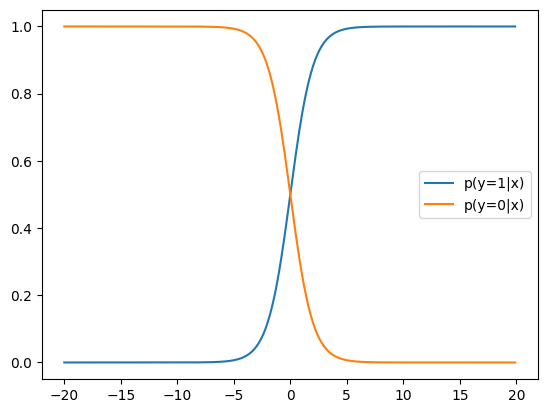

In [1]:
import numpy as np;import matplotlib.pyplot as plt;x = np.arange(-20.0, 20.0, 0.1);y = 1/(1+np.exp(-x));plt.plot(x,y);plt.plot(x,1-y);_=plt.legend(['p(y=1|x)','p(y=0|x)'])

# Logistic Regression + threshold for probability = classifier

In general the threshold is **0.5** to map it to a predicted class.

$$\frac{1}{1+\exp^{-\bmf{\theta}^T\mbf{x}}} > 0.5$$

<br>



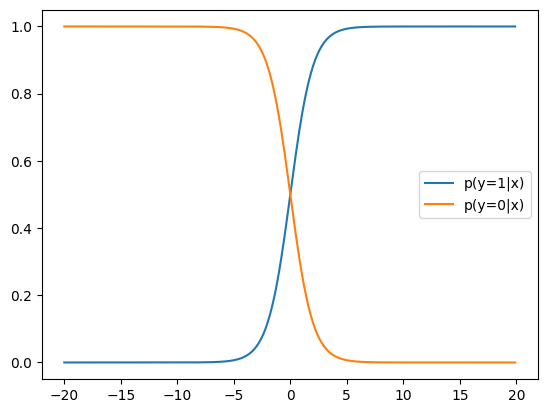

In [2]:
import numpy as np;import matplotlib.pyplot as plt;x = np.arange(-20.0, 20.0, 0.1);y = 1/(1+np.exp(-x));plt.plot(x,y);plt.plot(x,1-y);_=plt.legend(['p(y=1|x)','p(y=0|x)'])

# Learning Logistic Regression - No closed form solution

We model **conditional probability of $y|x$:**

$$ \begin{cases}
p(y=1| \mbf{x};\bmf{\theta}) = f_{\boldsymbol{\theta}}\\
p(y=0| \mbf{x};\bmf{\theta}) = 1- f_{\boldsymbol{\theta}}\\
\end{cases} $$


For a single point, the `if else` above based on the $y$ can be written compactly as:

$$p(y|\mbf{x};\bmf{\theta}) = \big(f_{\boldsymbol{\theta}}\big)^y\big(1-f_{\boldsymbol{\theta}}\big)^{1-y}$$

Which discrete distribution does the equation above resemble?

# Bernoulli Distribution

$$p(y|\mbf{x};\bmf{\theta}) = \big(p(y=1| \mbf{x};\bmf{\theta})\big)^y\big(1-p(y=1| \mbf{x};\bmf{\theta})\big)^{1-y}$$

**<center>Bernoulli Distribution</center>**

$$
 f(k;p) = \begin{cases}
   p & \text{if }k=1, \\
   q = 1-p & \text {if } k = 0.
 \end{cases}
$$

# Before moving to optimizing Logistic Regression
# let's have a "bird's eye" view

# Generalized Linear Models (GLM) - $\sigma(\bmf{\theta}^T\mbf{x})$

<br/><br/>

| **Data Type $y$**   	| **Expo. Family**    	| **Name/ML Topic**                   	|
|---------------------	|---------------------	|----------------------------	|
| $\mathbb{R}$        	| Gaussian<br>LaPlace 	| Regression                 	|
| $\{0,1\}$           	| Bernoulli           	| Binary Classification      	|
| $\{1,K\}$ 	| Categorical         	| Multi-class Classification 	|
| $\mathbb{N}_{+}$    	| Poisson             	| Poisson Regression (Counts)         	|
| Categorical         	| Dirichlet           	|   More advanced Topics           	|



# Generalized Linear Models (GLM) - $\sigma(\bmf{\theta}^T\mbf{x})$

**Property of GLM**

1. Make a choice on the distribution based on the label data type $y$ (support compatibile to the data type $y$)
2. Express the chosen distribution with **Exponential Family** _(that we did not cover here)_
    1. We model the conditional distribution $f_{\boldsymbol{\theta}}=\mathbb{E}(y|x;\theta)$
    2. This will give you your hypothesis $f_{\boldsymbol{\theta}}(\mbf{x}) \doteq \sigma\left(  \bmf{\theta}^T\mbf{x} \right)$ where $\sigma$ depends on what you chose before.
4. **Unified GD Update Rule for all GLM:** $$\theta := \theta + \gamma (y - \sigma(\bmf{\theta}^T\mbf{x}))\mbf{x}$$
<br/><br/>

| **Data Type $y$**   	| **Expo. Family**    	| **Name**                   	|
|---------------------	|---------------------	|----------------------------	|
| $\mathbb{R}$        	| Gaussian<br>LaPlace 	| Regression                 	|
| $\{0,1\}$           	| Bernoulli           	| Binary Classification      	|
| $\{1,K\}$ 	| Categorical         	| Multi-class Classification 	|
| $\mathbb{N}_{+}$    	| Poisson             	| Poisson Regression         	|
| Categorical         	| Dirichlet           	|   More advanced Topics           	|



# Linear Regression Revisited

| **Data Type $y$**   	| **Expo. Family**    	| **Name**                   	|
|---------------------	|---------------------	|----------------------------	|
| $\mathbb{R}$        	| Gaussian<br>LaPlace 	| Regression                 	|


Generation process: $$ y = \mathcal{N}(\bmf{\theta}^T\mbf{x};\sigma^2)~~ \text{same as }~~ y = \theta^T\mbf{x} + \epsilon~~\text{with}~~\epsilon \sim \mathcal{N}(0;\sigma^2)$$

# Linear Regression Revisited
**Generation process:** $$ y = \mathcal{N}(\bmf{\theta}^T\mbf{x};\sigma^2)~~ \text{same as }~~ y = \theta^T\mbf{x} + \epsilon~~\text{with}~~\epsilon \sim \mathcal{N}(0;\sigma^2)$$
<center><img src='figs/generation_linear_regression.png' width='70%'/></center>

# Linear Regression Revisited
Generation process: $$ y = \mathcal{N}(\bmf{\theta}^T\mbf{x};\sigma^2)~~ \text{same as }~~ y = \theta^T\mbf{x} + \epsilon~~\text{with}~~\epsilon \sim \mathcal{N}(0;\sigma^2)$$
<center><img src='figs/generation_linear_regression_2.png' width='70%'/></center>

# Linear Regression Revisited: What we see when we start

Generation process: $$ y = \mathcal{N}(\bmf{\theta}^T\mbf{x};\sigma^2)~~ \text{same as }~~ y = \theta^T\mbf{x} + \epsilon~~\text{with}~~\epsilon \sim \mathcal{N}(0;\sigma^2)$$
<center><img src='figs/generation_linear_regression_3.png' width='60%'/></center>

# Linear Regression Revisited: What we have to invert

<center><img src='figs/generation_linear_regression_4.png' width='90%'/></center>

# Something similar holds for Logistic Regression

$$ y_i | \mbf{x}_i \sim \operatorname{Bern}\left(\frac{1}{1+\exp(-\theta^T\mbf{x}_i)}\right)$$

# Something similar holds for Logistic Regression
<br>
<center><img src='figs/generation_logistic_regression.png' width='80%'/></center>

# Something similar holds for Logistic Regression
<br>
<center><img src='figs/generation_logistic_regression_2.png' width='80%'/></center>

# Logistic Regression Data

<br>
<center><img src='figs/generation_logistic_regression_3.png' width='60%'/></center>

# Learning Logistic Regression - Maximizing Log Likelihood

# Learning Logistic Regression - Maximizing Log Likelihood

We model **conditional probability of $y|x$:**

$$ \begin{cases}
p(y=1| \mbf{x};\bmf{\theta}) = f_{\boldsymbol{\theta}}\\
p(y=0| \mbf{x};\bmf{\theta}) = 1- f_{\boldsymbol{\theta}}\
\end{cases} $$

For multiple training points, using I.I.D. assumptions:

$$
\begin{aligned}
L(\theta;\mbf{X};\mbf{y}) &=p(\vec{y} \mid X ; \theta) =\\
L(\theta;\mbf{X};\mbf{y}) &=p(\vec{y} \mid {\mbf{x}_1,\ldots,\mbf{x}_n} ; \theta)= [IID] \\
&=\prod_{i=1}^{n} p\left(y^{(i)} \mid x^{(i)} ; \theta\right) \\
&=\prod_{i=1}^{n}\left(f_{\boldsymbol{\theta}}\left(x^{(i)}\right)\right)^{y^{(i)}}\left(1-f_{\boldsymbol{\theta}}\left(x^{(i)}\right)\right)^{1-y^{(i)}}
\end{aligned}
$$

# Learning Logistic Regression - Maximizing Log Likelihood

We get the **Log-loss** that we have seen in the lecture on **evaluating the models**!
<br><br>
$$
\begin{aligned}
\ell(\theta) &=\log L(\theta) \\
&=\sum_{i=1}^{n} y^{(i)} \log f\left(x^{(i)}\right)+\left(1-y^{(i)}\right) \log \left(1-f\left(x^{(i)}\right)\right)
\end{aligned}
$$

# Learning Logistic Regression - Gradient of Log Likelihood

We get the **Log-loss** that we have seen in the lecture on **evaluating the models**!

$$
\begin{aligned}
&\nabla_{\theta}\log L(\theta)= \\
&=\nabla_{\theta}\sum_{i=1}^{n} y^{(i)} \log f_{\theta}\left(x^{(i)}\right)+\left(1-y^{(i)}\right) \log \left(1-f_{\theta}\left(x^{(i)}\right)\right)
\end{aligned}
$$

but before let's compute the gradient of the logistic function.



# Gradient/Derivative of Logistic Function

$$\sigma(z) =  \frac{1}{1+\exp^{-z}} = (1+\exp^{-z})^{-1} $$

$$\sigma(z)' = -1(1+\exp^{-z})^{-1-1}\cdot(-\exp^{-z}) $$

$$\sigma(z)' = \frac{-1}{(1+\exp^{-z})^{2}}\cdot(-\exp^{-z}) $$

$$\sigma(z)' = \frac{-1}{(1+\exp^{-z})}\cdot\frac{-\exp^{-z}}{(1+\exp^{-z})} $$

$$\sigma(z)' = \frac{1}{(1+\exp^{-z})}\cdot\frac{\exp^{-z}}{(1+\exp^{-z})} $$

$$\sigma(z)' = \frac{1}{(1+\exp^{-z})}\cdot\frac{1-1+\exp^{-z}}{(1+\exp^{-z})} $$

$$\sigma(z)' = \frac{1}{(1+\exp^{-z})}\cdot\frac{1+\exp^{-z}-1}{(1+\exp^{-z})} $$

# Gradient of Logistic Function
$$\sigma(z)' = \frac{1}{(1+\exp^{-z})}\cdot\frac{1+\exp^{-z}-1}{(1+\exp^{-z})} $$


$$\sigma(z)' = \frac{1}{(1+\exp^{-z})}\cdot\Big(1-\frac{1}{(1+\exp^{-z})}\Big) $$

$$\sigma(z)' = \underbrace{\frac{1}{(1+\exp^{-z})}}_{sigmoid}\cdot\Big(1-\underbrace{\frac{1}{(1+\exp^{-z})}}_{sigmoid}\Big) $$



$$\sigma(z)' = \sigma(z)(1-\sigma(z)) $$

# Learning Logistic Regression - Gradient of Log Likelihood

We get the **Log-loss** that we have seen in the lecture on **evaluating the models**!

$$
\begin{aligned}
&\nabla_{\theta}\log L(\theta)= \\
&=\nabla_{\theta}\sum_{i=1}^{n} y^{(i)} \log f_{\theta}\left(x^{(i)}\right)+\left(1-y^{(i)}\right) \log \left(1-f_{\theta}\left(x^{(i)}\right)\right)
\end{aligned}
$$

# Learning Logistic Regression - Gradient of Log Likelihood

We get the **Log-loss** that we have seen in the lecture on **evaluating the models**!

$$
\begin{aligned}
&\nabla_{\theta}\log L(\theta)= \\
&=\nabla_{\theta}\sum_{i=1}^{n} y^{(i)} \log[\sigma{(\theta^Tx^{(i)})}]+\left(1-y^{(i)}\right) \log [1-\sigma{(\theta^Tx^{(i)})}]
\end{aligned}
$$

# Learning Logistic Regression - Gradient of Log Likelihood


$$\sum_{i=1}^{n} y^{(i)}\frac{1}{\sigma{(\theta^Tx^{(i)})}}\cdot\sigma{(\theta^Tx^{(i)})}^{\prime}x^{(i)} +(1-y)^{(i)} (\frac{1}{1-\sigma{(\theta^Tx^{(i)})}})\left(-\sigma{(\theta^Tx^{(i)})}^{\prime}x^{(i)}\right)$$

Remember:

$$\sigma(z)' = \sigma(z)(1-\sigma(z)) $$

# Learning Logistic Regression - Gradient of Log Likelihood


$$\sum_{i=1}^{n} y^{(i)}\frac{1}{\sigma{(\theta^Tx^{(i)})}}\cdot\Big(\sigma(\theta^Tx^{(i)})(1-\sigma(\theta^Tx^{(i)}))\Big)x^{(i)} +(1-y)^{(i)} (\frac{1}{1-\sigma{(\theta^Tx^{(i)})}})\left(-\Big(\sigma(\theta^Tx^{(i)})(1-\sigma(\theta^Tx^{(i)}))\Big)x^{(i)} \right)$$

# Learning Logistic Regression - Gradient of Log Likelihood


$$\sum_{i=1}^{n} y^{(i)}\Big((1-\sigma(\theta^Tx^{(i)})\Big))x^{(i)} +(1-y)^{(i)}\left(-\Big(\sigma(\theta^Tx^{(i)})\Big)x^{(i)} \right)$$

# Learning Logistic Regression - Gradient of Log Likelihood


$$\sum_{i=1}^{n} \big[ y^{(i)}\Big((1-\sigma(\theta^Tx^{(i)}))\Big)+(1-y)^{(i)}\left(-\Big(\sigma(\theta^Tx^{(i)})\Big)\right)\big]x^{(i)}$$

$$\sum_{i=1}^{n} \big[ y^{(i)}-y^{(i)}\sigma(\theta^Tx^{(i)})-\sigma(\theta^Tx^{(i)})+y^{(i)}\sigma(\theta^Tx^{(i)})\big]x^{(i)}$$

$$\sum_{i=1}^{n} \big[ y^{(i)}-\sigma(\theta^Tx^{(i)})\big]x^{(i)}$$

# Gradient Ascent for Logistic Regression since maximizing Log Likelihood

$$\bmf{\theta} := \bmf{\theta} + \gamma  \sum_{i=1}^{n} \big[ y^{(i)}-\sigma(\theta^Tx^{(i)})\big]\mbf{x^{(i)}}$$

$$\bmf{\theta} := \bmf{\theta} + \gamma  \sum_{i=1}^{n} \big[ y^{(i)}-f_{\theta}\left(x^{(i)}\right)\big]\mbf{x^{(i)}}$$

## Same update rule for linear regression but  $f_{\theta}\left(x^{(i)}\right)$ changes!

## Because of the property of GLM!

# A note on convexity

All latest parametric supervised problems we have discussed are **convex**. 

The loss in function of the parameters is convex. 

- Least squares, robust regression, logistic regression, Support Vector Machines, multi-class logistic etc.
- All of the above with L2-regularization.

**GD gives you a global minimum/maximum on convex functions (optimization is easy)**

# Logistic Regression vs Least Squares (Linear Regression)


<center><img src='figs/least_squares_vs_logistic_function.png' width='60%'></center>

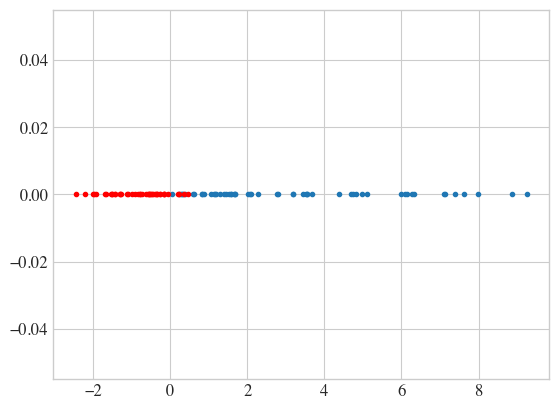

In [27]:
# Generate a toy dataset, it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += 0.3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

plt.plot(X[y==1],[0]*sum(y==1),'.')
plt.plot(X[y==0],[0]*sum(y==0),'r.');

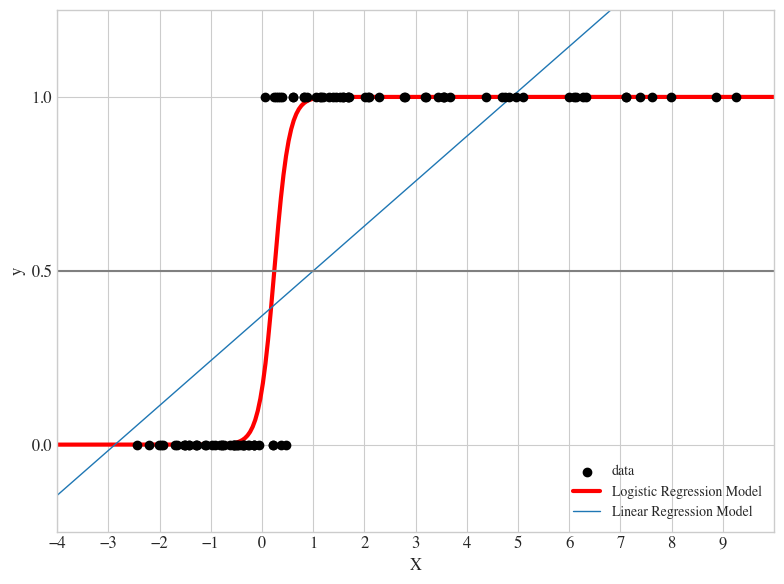

In [28]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, LinearRegression
from scipy.special import expit



# Fit the classifier
clf = LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(8, 6))
plt.clf()
plt.scatter(X.ravel(), y, color="black", zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color="red", linewidth=3)

ols = LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(0.5, color=".5")

plt.ylabel("y")
plt.xlabel("X")
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-4, 10)
plt.legend(
    ("data","Logistic Regression Model", "Linear Regression Model"),
    loc="lower right",
    fontsize="small",
)
plt.tight_layout()
plt.show()

In [29]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=0, class_sep=0.8)

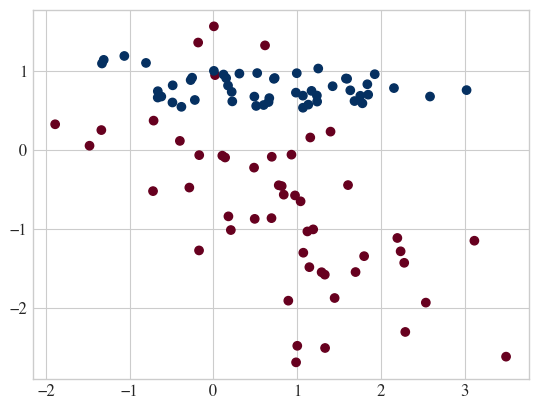

In [30]:
plt.scatter(*X.T,c=y,cmap=cm.get_cmap("RdBu"));

$$ \min_{w, c} \frac{1}{2}w^T w + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1) $$

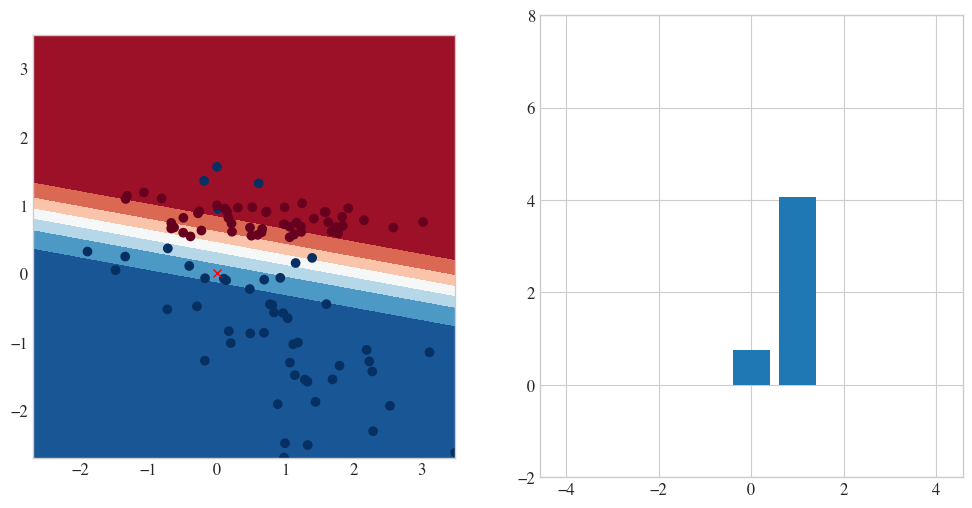

In [31]:
clf = LogisticRegression(penalty='none')
clf.fit(X, y); minx, maxx = X.min(), X.max()
support = np.linspace(minx, maxx, 100)
xx, yy = np.meshgrid(support, support)
points = np.stack((xx.flatten(), yy.flatten()), axis=1)
prob_mesh = clf.predict_proba(points)
prob_mesh = prob_mesh[:,0].reshape(xx.shape)
fig, axes = plt.subplots(1,2,figsize=(12,6))
axes[0].contourf(xx,yy,prob_mesh,cmap=cm.get_cmap("RdBu"));axes[0].plot(0,0,'rx')
axes[0].scatter(*X.T,c=(1-y),cmap=cm.get_cmap("RdBu"));
axes[0].axis('scaled');axes[1].bar([0,1],clf.coef_[0]);axes[1].axis('equal');axes[1].set_xlim((-5,5));axes[1].set_ylim((-2,8));

<center><video controls src='https://jermwatt.github.io/machine_learning_refined/notes/6_Linear_twoclass_classification/videos/animation_1.mp4' width='90%' /></center>

# Artificial Intelligence and Machine Learning

## Unit II


## From Logistic Regression to Softmax Classifier (multi-class)

# Information Theory View on Log Loss

# Information Theory View on Log Loss

$$
\begin{aligned}
&\log L(\theta)= \\
&=\sum_{i=1}^{n} y^{(i)} \log f\left(x^{(i)}\right)+\left(1-y^{(i)}\right) \log \left(1-f\left(x^{(i)}\right)\right)
\end{aligned}
$$

# Information Theory View on Log Loss

$$
\begin{aligned}
&\log L(\theta)= \\
&=\sum_{i=1}^{n} y^{(i)} \log p\left(x^{(i)}\right)+\left(1-y^{(i)}\right) \log \left(1-p\left(x^{(i)}\right)\right)
\end{aligned}
$$

## How do we relate Log Loss with Information Theory?

# Information Theory View on Log Loss

- The problem is still binary classification $y \in \{0,1\}$
- Instead of modeling $y \in \{0,1\}$ let's say $\vec{\mbf{y}}$ is a vector of the same dimension of the number of classes.
- $\mbf{y} \in \{0,1\}^K$ with $\mbf{y}$ being a **Categorical distribution** where the mass is all concentrated in the index of the ground-truth label.
    - Only `[1,0]` and `[0,1]` are possible for 2 classes since it has to be a prob. distribution
    - `[1,1]` is not a prob. distribution

So for a $K=2$ binary class problem,e.g. (spam vs not-spam) the possible labels could be:

$$ y_{spam} = [1, 0]^T$$ 
$$ y_{not-spam} = [0, 1]^T$$ 

# One-Hot Encoding


$$ y_{spam} = [1, 0]^T$$ 
<div align='center'>
    <img src="figs/one_hot_01.png">
</div>

# One-Hot Encoding

$$ y_{not-spam} = [0, 1]^T$$ 

<div align='center'>
    <img src="figs/one_hot_02.png">
</div>

# Logistic Regression Output vs One-Hot Encoding

Who can tell me how we can compare two _[discrete]_ probability distributions?
<br><br>
<div align='center'>
    <img src="figs/one_hot_03.png">
</div>

# "Divergence" between two [discrete] distributions


**Objective**: Estimate a sort of "distance" (or better **divergence**) between two distributions **$p(x)$ vs $q(x)$**.

- We have an ~~**unknown distribution**~~ **distribution from the labels** $p(x)=[1,0]$ 
- We want to model it using an **approximating distribution from your model** $q(x)=[0.2, 0.8]$. 

If we use $q(x)$ to construct a coding scheme for the purpose of transmitting values of $x$ to a receiver instead of $p(x)$, then the **average additional amount of information** required to specify the value of $x$ as a result of using $q(x)$ instead of the true distribution $p(x)$ is given by:

$$ 
\underbrace{H(P,Q)}_{\text{q not p, so extra}} - \underbrace{~~H(P)~~}_{\text{best we can do}}
$$

**Idea**: if you use **q** instead of **p**, but the underlying process is governed by **p**, then you need to pay an extra price in transmission a bit more of information. "The bit more" is the equation above.

# Measuring the "divergence" between two distributions

$$ 
H(P,Q) - H(P) = \underbrace{-\sum_{x \in X} p(x)\log q(x)}_{\text{cross-entropy}} - \underbrace{\big(-\sum_{x \in X} p(x)\log p(x)\big)}_{\text{entropy}}
$$

# Measuring the "divergence" between two distributions

- $p(x)=[1,0]$ is the **one-hot encoding of the labels**
- $q(x)=[0.2, 0.8]$ is the output from your model. We want $q$ to match $p$ (prediction to match label)

**We can use KL divergence!**

$$ 
KL(P||Q) = H(P,Q) - H(P) = \underbrace{-\sum_{x \in X} p(x)\log q(x)}_{\text{cross-entropy}} - \underbrace{\big(-\sum_{x \in X} p(x)\log p(x)\big)}_{\text{entropy}}
$$

# Relative entropy or Kullback-Leibler (KL) divergence

$$ 
KL(P||Q)= \sum_{x \in X} p(x)\log \Big( \frac{p(x)}{q(x)} \Big)
$$

**Note that:**

- $KL(P||Q) \neq KL(Q||P)$ so it is **NOT a distance metric**, but thankfully the following holds:
- $KL(P||Q) = 0 \longleftrightarrow p = q$

# KL divergence reverts back to Cross-Entropy with One-Hot Encoding

Wait a second but....**how much is the entropy of the "labels"** aka entropy of $[0,1]$ or $[1,0]$?

<br><br>
$$ 
H(P,Q) - H(P) = \underbrace{-\sum_{x \in X} p(x)\log q(x)}_{\text{cross-entropy}} - \underbrace{\big(-\sum_{x \in X} p(x)\log p(x)\big)}_{\text{entropy of labels is zero}}
$$

$$ 
H(P,Q) = \underbrace{-\sum_{x \in X} p(x)\log q(x)}_{\text{cross-entropy}}
$$

# Training by minimizing cross-entropy (CE)

- $p(y|x)=[1,0]$ is the **one-hot encoding of the labels**
- $q(y|x)=[0.2, 0.8]$ is the output from your model. We want $q$ to match $p$.

$$ 
H(P,Q) - H(P) = \underbrace{-\sum_{y \in Y} p(y|x)\log q(y|x)}_{\text{cross-entropy}}
$$

$$-1\cdot\ln(0.2)-0\cdot \ln(0.8) = -\ln(0.2)\approx 1.6$$

# Information Theory View on Log Loss

**Maximizing Log Likelihood** -  I removed the sum over training samples for clarity

$$
\begin{aligned}
&\log L(\theta)= y^{(i)}\log p\left(x^{(i)}\right)+\left(1-y^{(i)}\right) \log \left(1-p\left(x^{(i)}\right)\right)
\end{aligned}
$$

**Minimizing Cross-Entropy**

$$ \begin{aligned}
H(P,Q) - H(P) = \underbrace{-\sum_{y \in Y} p(y|x)\log q(y|x)}_{\text{cross-entropy}} \\
-\Big(p(y=1)\log q(y=1|x)+p(y=0)\log q(y=0|x)\Big)\\
-\Big(p(y=1)\log q(y=1|x)+(1-p(y=1))\log (1-q(y=1|x))\Big)\\
-\Big(y\log q(y=1|x)+(1-y)\log (1-q(y=1|x))\Big)\\
\end{aligned} $$


# Information Theory View on Log Loss
**Maximizing Log Likelihood**

$$y \log p\left(x\right)+\left(1-y\right) \log \left(1-p\left(x\right)\right) $$

**Minimizing Cross-Entropy**
$$-\Big(y\log q(y=1|x)+(1-y)\log (1-q(y=1|x))\Big)$$

# Which loss, if you have "soft" labels?

<div align='center'>
    <img src="figs/soft.png">
</div>

## Use the "full" KL divergence not cross-entropy!

# Does Cross-Entropy works for Multi-Class?

# Minimizing cross-entropy (CE) works even in a multi-class case

- $p(y|x)=[0,0,0,1,0]$ is the **one-hot encoding of the labels**
- $q(y|x)=[0.1, 0.1, 0.1, 0.35, 0.35]$ is the output from your model. We want $q$ to match $p$.

$$ 
H(P,Q) - H(P) = \underbrace{-\sum_{y \in Y} p(y|x)\log q(y|x)}_{\text{cross-entropy}}
$$

$$-0\cdot\ln(0.1)-0\cdot\ln(0.1)-0\cdot\ln(0.1)\underbrace{-1\cdot\ln(0.35)}_{\text{only this matter}}-0\cdot\ln(0.35)=-1\cdot\ln(0.35)\approx1.04$$

# One-hot encoding is a selector!


- $p(y|x)=[0,0,0,1,0]$ is the **one-hot encoding of the labels** works as a selector of probability of the model!
- Of the probabilities returned by the model select that for which the index $gt$ corresponds to the `1` in the label.

$$ \mathcal{L} = -\log q(y|x)_{gt}$$

- **This is the loss function used to train Neural Networks for Multi-Class classification (image recognition).**

# Todays lecture
## Supervised, <ins>Parametric</ins> Models

### 0) More Sample Questions similar to the exam
### 1) Multi-class Classification
### 2) SoftMax Regression (for multi-class classification)

# I am still deciding but probably 3 types of questions

1. Simple **exercises** like the ones we saw for Decision Trees, KNN etc. but also on other methods (SVM, linear regression, SoftMax etc.)
2. **Definitions + Proof Sketch** like the ones that we show in class.
3. Answering critical open questions but you have to show **some kind of math or graph/plot sketch behind your rationale**

- Still deciding about adding `multiple choice questions`
- Questions will be spread over the entire program _(math, norms, clustering, supervised non-parametric, parametric models, neural nets etc)_.

The questions will be of increasing difficulties and calibrated to the test time.

# K-NN


Given the following training data for a $\{0, 1\}$ binary classifier 
- $(x_1 = 0.8; y_1 = 1)$ 
- $(x_2 = 0.4; y_2 = 0)$ 
- $(x_3 = 0.6; y_3 = 1)$

Determine the output of a **K Nearest Neighbour (K-NN) classifier** for all points on the interval $0 \le x \le 1$ using:
- 1-NN
- 3-NN

# K-NN


Given the following training data for a $\{0, 1\}$ binary classifier 
- $(x_1 = 0.8; y_1 = 1)$ 
- $(x_2 = 0.4; y_2 = 0)$ 
- $(x_3 = 0.6; y_3 = 1)$

# 1-NN

# K-NN


Given the following training data for a $\{0, 1\}$ binary classifier 
- $(x_1 = 0.8; y_1 = 1)$ 
- $(x_2 = 0.4; y_2 = 0)$ 
- $(x_3 = 0.6; y_3 = 1)$

# 3-NN

Do we have actually to compute it?

Will be majority vote of class labels since we classify using all training points. **Aka, we have two "1" and one "0". So always 1!**

# K-NN - Do it yourself

A regressor algorithm is defined using the mean of the **K Nearest Neighbours** of a test point. Determine the ouput on the interval $0 \le x \le 1$ using the training data in the previous example for $K=2$.

#  Definitions + Proof Sketch seen in the lectures

- Define what is the entropy of a discrete random variable.
- How do you compare two discrete probability distributions?
- Show that minimizing the entropy of a distribution $P$ is the same as finding a function of $P$ that is as far as possible from another distribution Q that is **uniform distribution across K classes**?

# Learning a decision tree is about <ins>reducing impurity</ins>

- So we want to reduce 1) Misclassification or 2)Gini Impurity or 3) **? What else ?**

- **Know your enemy**: the uniform distributions $\mbf{x} \sim\mathcal{U}$
- If we have $K$ classes then $\{q_1,\ldots, q_k\} = \{1/K,\ldots, 1/K\}$

We want find a function $f(p)$ so that $f(p)$ is very distant from uniform distribution $Q$, so we can use KL divergence for this:

$$
KL(P||Q)= \sum_{k=1}^K p(x)\log \Big( \frac{p(x)}{1/K} \Big) = \sum_{k=1}^K p(x)\log\big(p(x)\big)-p(x)\log\big(1/K\big)
$$

# Critical Questions (Example on K-means)

You and your best friend found a trick to save bandwidth over the internet. Instead of sharing a total of $N=10M$ grayscale images directly over the Internet, you took the $N$ images and learned $K=1000$ centroids $\{\mu_1,\ldots,\mu_{K}\}$ using **K-means**. Each input image is defined over the set $\mbf{x} \in [0,255]^{H\times W \times 1}$.
Then you shared once for all the $K$ centroids $\{\mu_k\}_{k=1}^{K}$ with your friend.
- Every time you want to send one of the $N$ images $\mbf{x}$, you send your friend the **associated assignment $y$** found by K-means. 
- Along with $y$, you also send the **Euclidean distance** $d$ between the image $\mbf{x}$ and the associated centroid.

# Critical Questions (Example on K-means)

**Easy Questions: (check if you know the basic notions)**
- What is the dimensionality of $\mu_k$? Is it equal for all centroids?
- What is the dimensionality of the assignment $y$ associated to $\mbf{x}$.
- Which values the assignment $y$ can take?


**More Difficult Questions: (check if you can reason on problems)**
- Does your friend have a way to restore the original image $\mbf{x}$, given $d$ and $y$?
- If yes, how he/she can do it? If no, can she/he retrieve a set of images in which $\mbf{x}$ could be inside?
- How many parameters (scalar numbers) you have to pass if you share an image $\mbf{x}$? What about sharing $d$ and $y$?

You send $y$ associated to the image $\mbf{x}$, so $y$ takes value in $[1,K]$ and you friend can use $y$ to select the centroid nearest to the point $\mbf{x}$. 

In fact, the point $\mbf{x}$ was clustered in the cluster given by $y$. 

So one could stop here and say that the best approximation for $\mbf{x}$ is $\mu_{y}$ ($\mbf{x} \approx \mu_{y}$) but we can do more.

Given that we have the scalar euclidean distance between $\mbf{x}$ and the associated centroid aka $\mu_{y}$ we have:

$$ d= \vert \vert \mbf{x} -\mu_{y} \vert \vert_2$$

We have only $d$ and $\mu_{y}$, the image $\mbf{x}$ that was sent is in the set:

$$ \{\forall~\mbf{v} \in [0,255]^{H\times W \times 1}: \vert \vert \mbf{v} - \mu_y \vert \vert_2 = d \}$$

which is all the points in the hyper-sphere in $[0,255]^{H\times W \times 1}$ of radius $d$ and centered at $\mu_y$

# Critical Questions (Example on Norms) - A bit harder

You are hired by a famous company that has to compute $\ell_2^2$ norm over two feature vectors $\mbf{x} \in \mathbb{R}^{D}$ and $\mbf{y}\in \mathbb{R}^{D}$.

The company works with a machine learning algorithm that **guarantees** that the features $\mbf{x}$ and $\mbf{y}$  lie on a unit hyper-sphere (_Hint: same as $\vert \vert x \vert\vert_2^2  =1$)_


$$ d^2 = \vert \vert \mbf{x} - \mbf{y} \vert\vert_2^2 = \sum_{i=1}^D (x_i - y_i)^2$$

- Can you get away computing this without computing the squared difference, i.e. avoiding computing $(\diamond - \diamond)^2$?
- What is the minimum and **maximum** value that $d$ can take?

_(Hint: develop the definition of the norm written above)_

$$\sum_{i=1}^D (x_i - y_i)^2 = \sum_{i=1}^D x_i^2 + y_i^2 -2x_i\cdot y_i = \sum_{i=1}^D x_i^2 + \sum_{i=1}^D y_i^2 -2 \sum_{i=1}^D x_i\cdot y_i=$$

$$\vert \vert \mbf{x}  \vert \vert_2^2+\vert \vert \mbf{y}  \vert \vert_2^2 -2 \mbf{x}^T\mbf{y}$$

Using unit hyper-sphere:
$$1 + 1 - 2 \mbf{x}^T\mbf{y} = 2 - 2 \mbf{x}^T\mbf{y}$$

So, yes, they can simply computing the dot product multiply by -2 and add 2.

- Minimum value of $d$ is zero since $\ell_2$ is bounded by zero.
- Maximum is when vectors are parallel but facing opposite directions, in this case $\mbf{x}^T\mbf{y}=-1$ thus $d^2= 2 - 2 (-1)= 4 \implies d=2$, which makes sense because two vectors on the unit hyper-sphere are at maximum distance when match the diameter.

# Multi-class Classification

# Multi-class Classification as GLM

| **Data Type $y$**   	| **Expo. Family**    	| **Name**                   	|
|---------------------	|---------------------	|----------------------------	|
| $\{1,K\}$ 	| Categorical         	| Multi-class Classification 	|



# Multi-Class: One vs Rest (left) and One vs One (right)


**Regions of the space remains unclassified**

<center><img src="figs/multi_class_one_vs_rest.png" width='70%'/></center>

# Multi-class classifier via One vs Rest 


<center>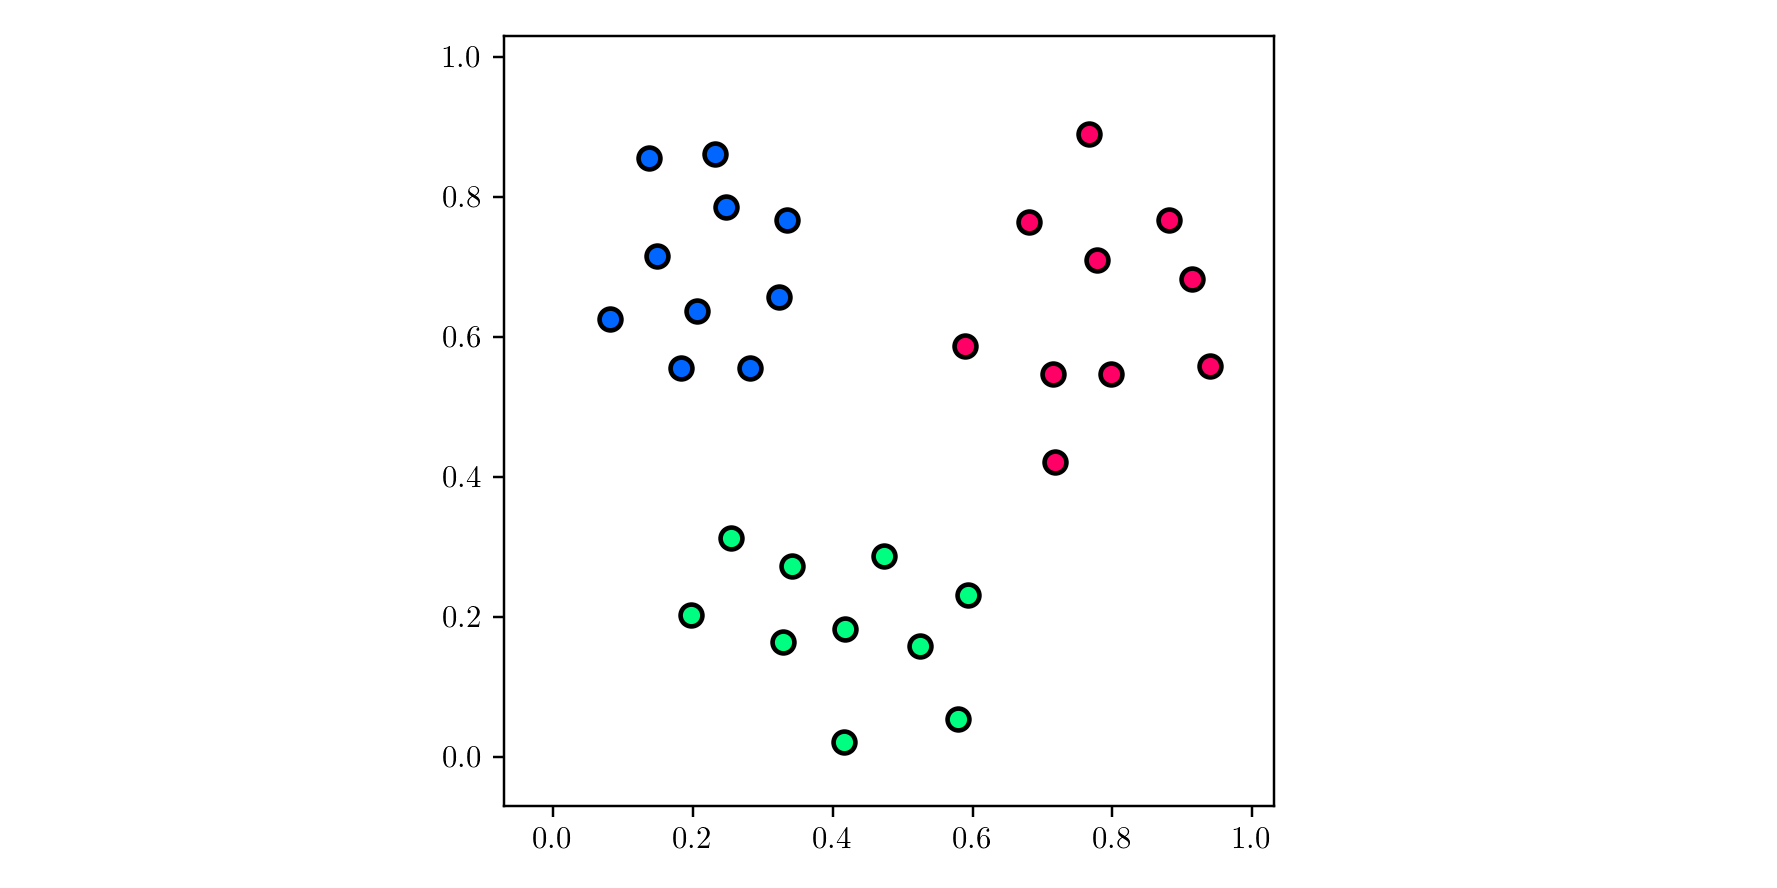</center>

# Multi-class via $K$ One vs Rest Binary Classifers

<br><br>
<center>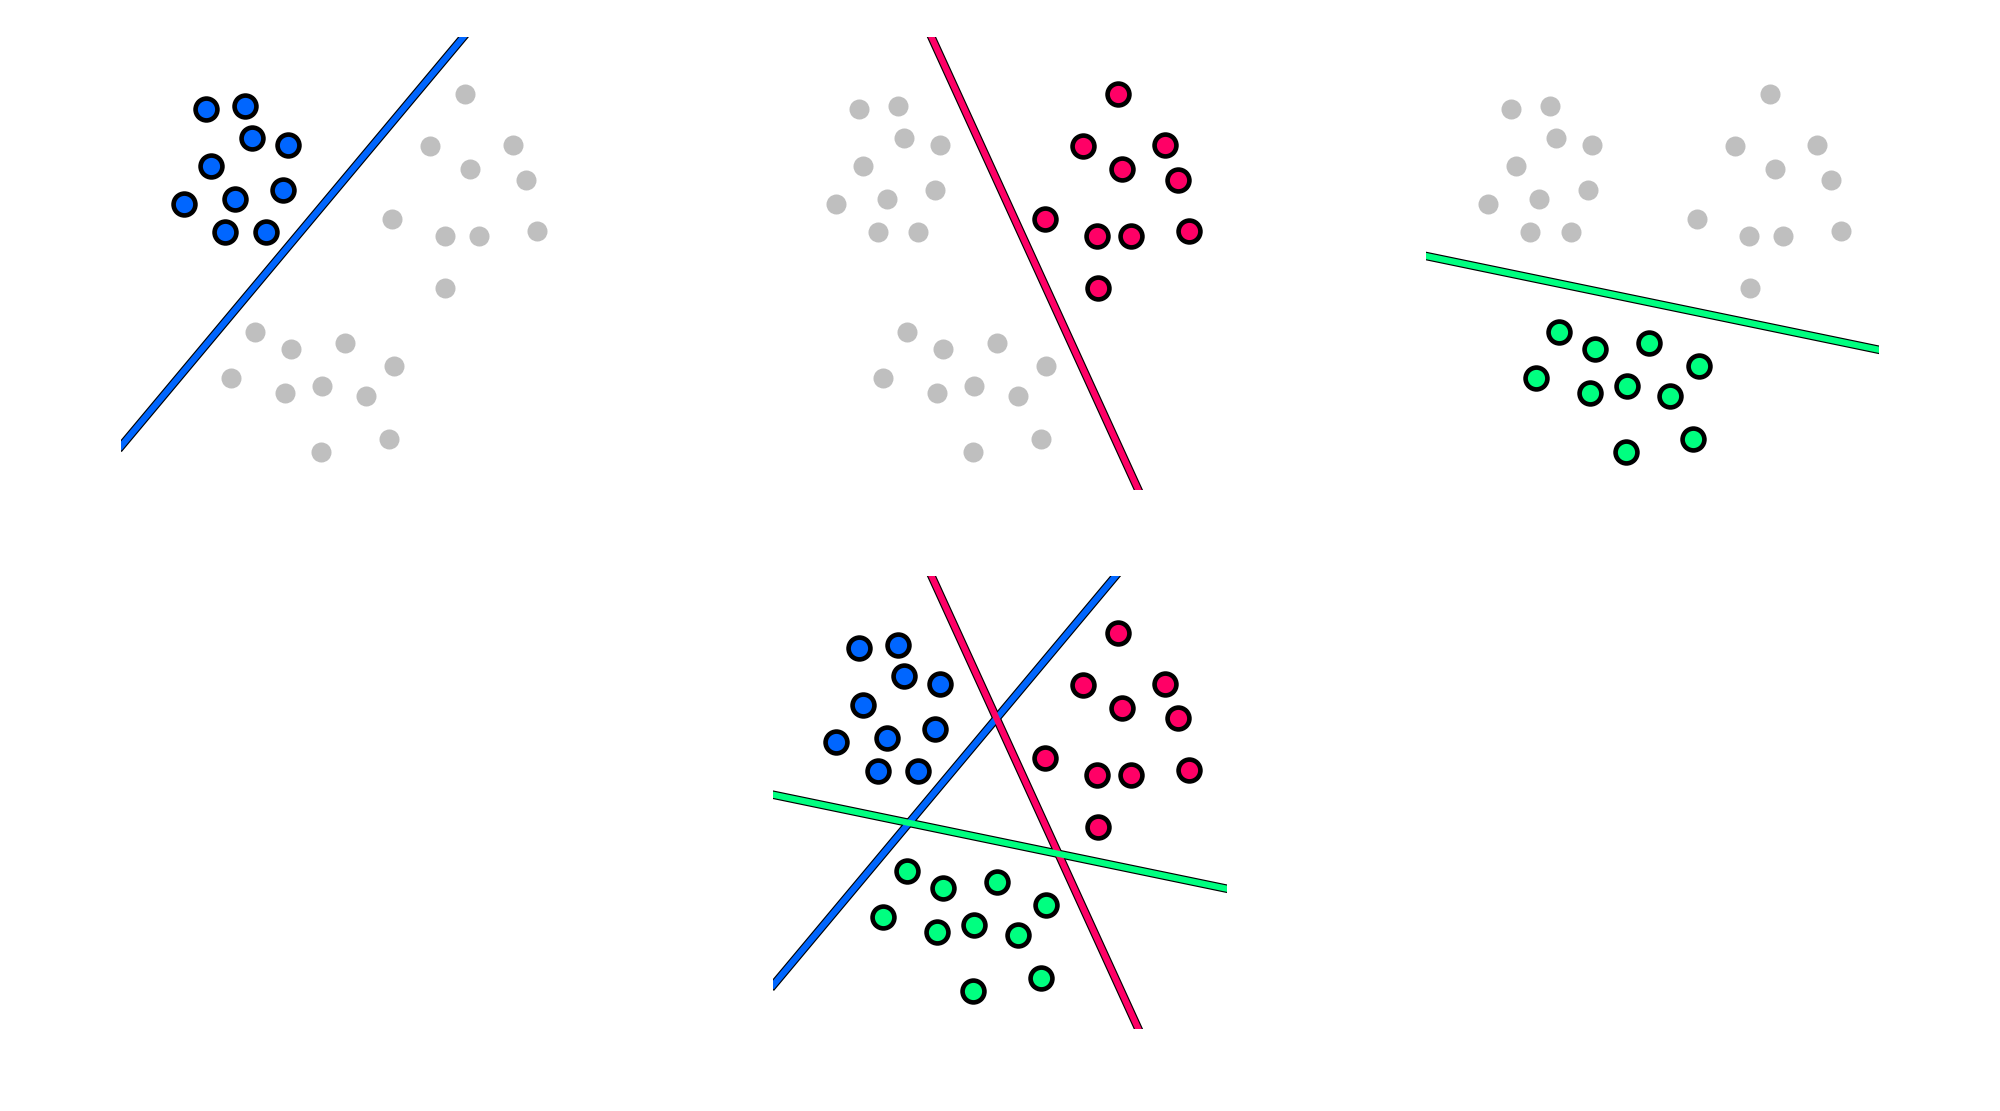</center>

# Multi-class via $K$ One vs Rest Binary Classifers

<br><br>
<center>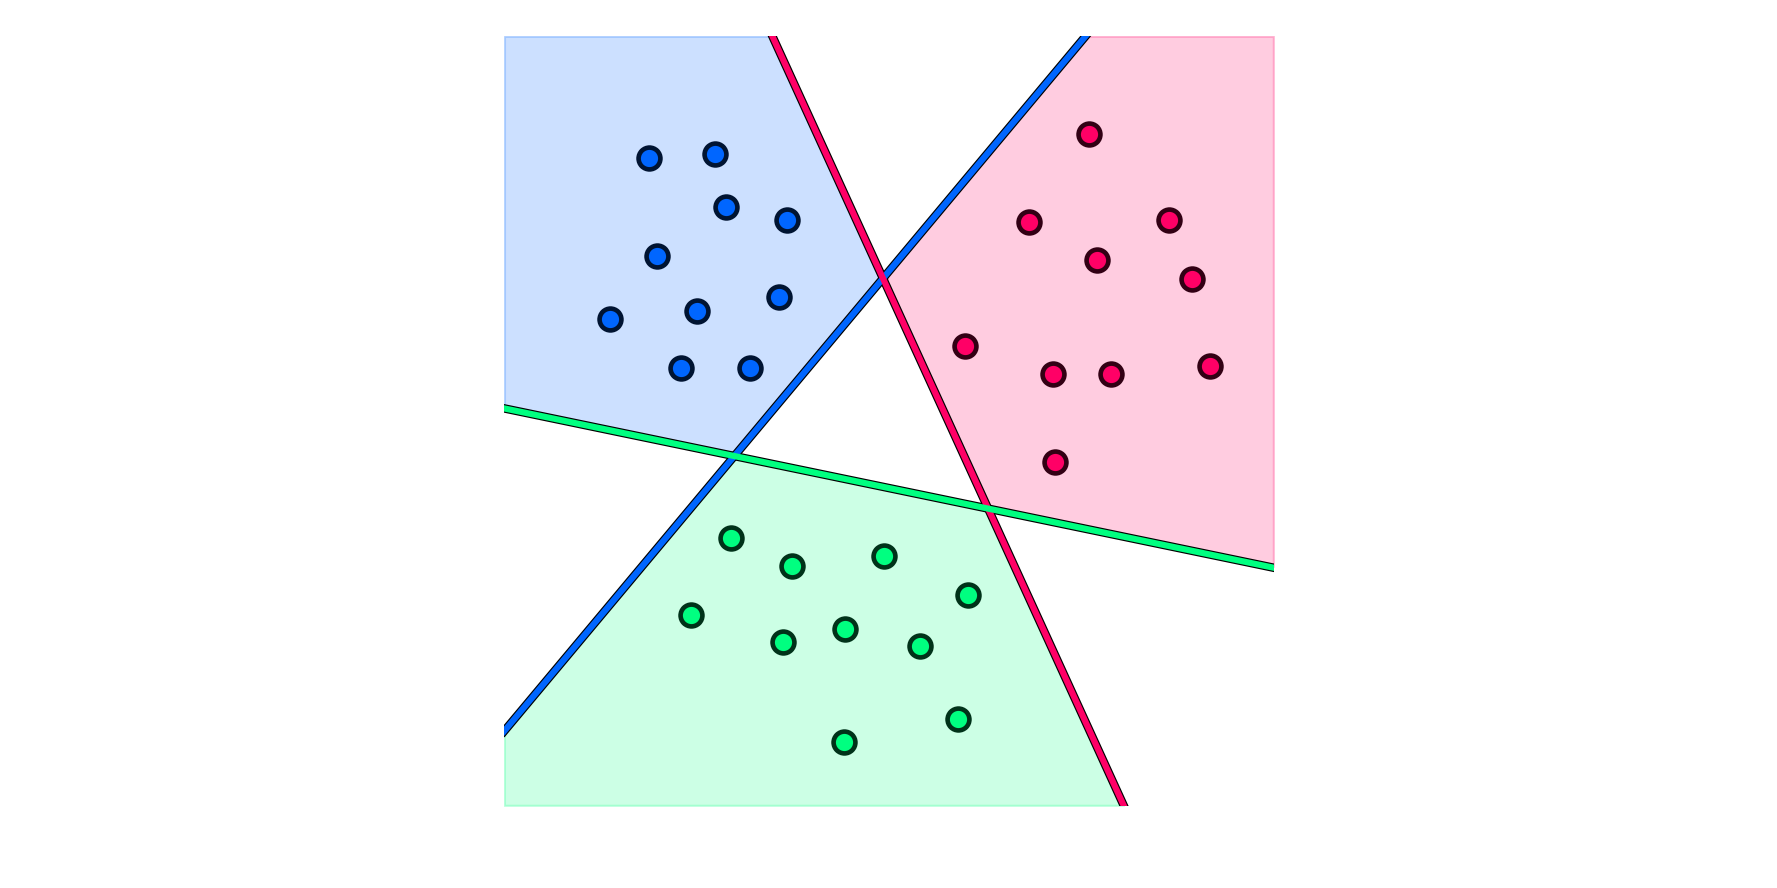</center>

# One vs Rest Binary Classifers - Positive Overlap

$$\mbf{w}_1^T\mbf{x}+b_1 >0\quad\text{and}\quad\mbf{w}_3^T\mbf{x}+b_3 >0$$

$\mbf{x}$ is assigned to point with higher distance to the hyper-plane (because it is more confident to be that class).
- Left case: blue class; Right case: red class

<br><br>
<center>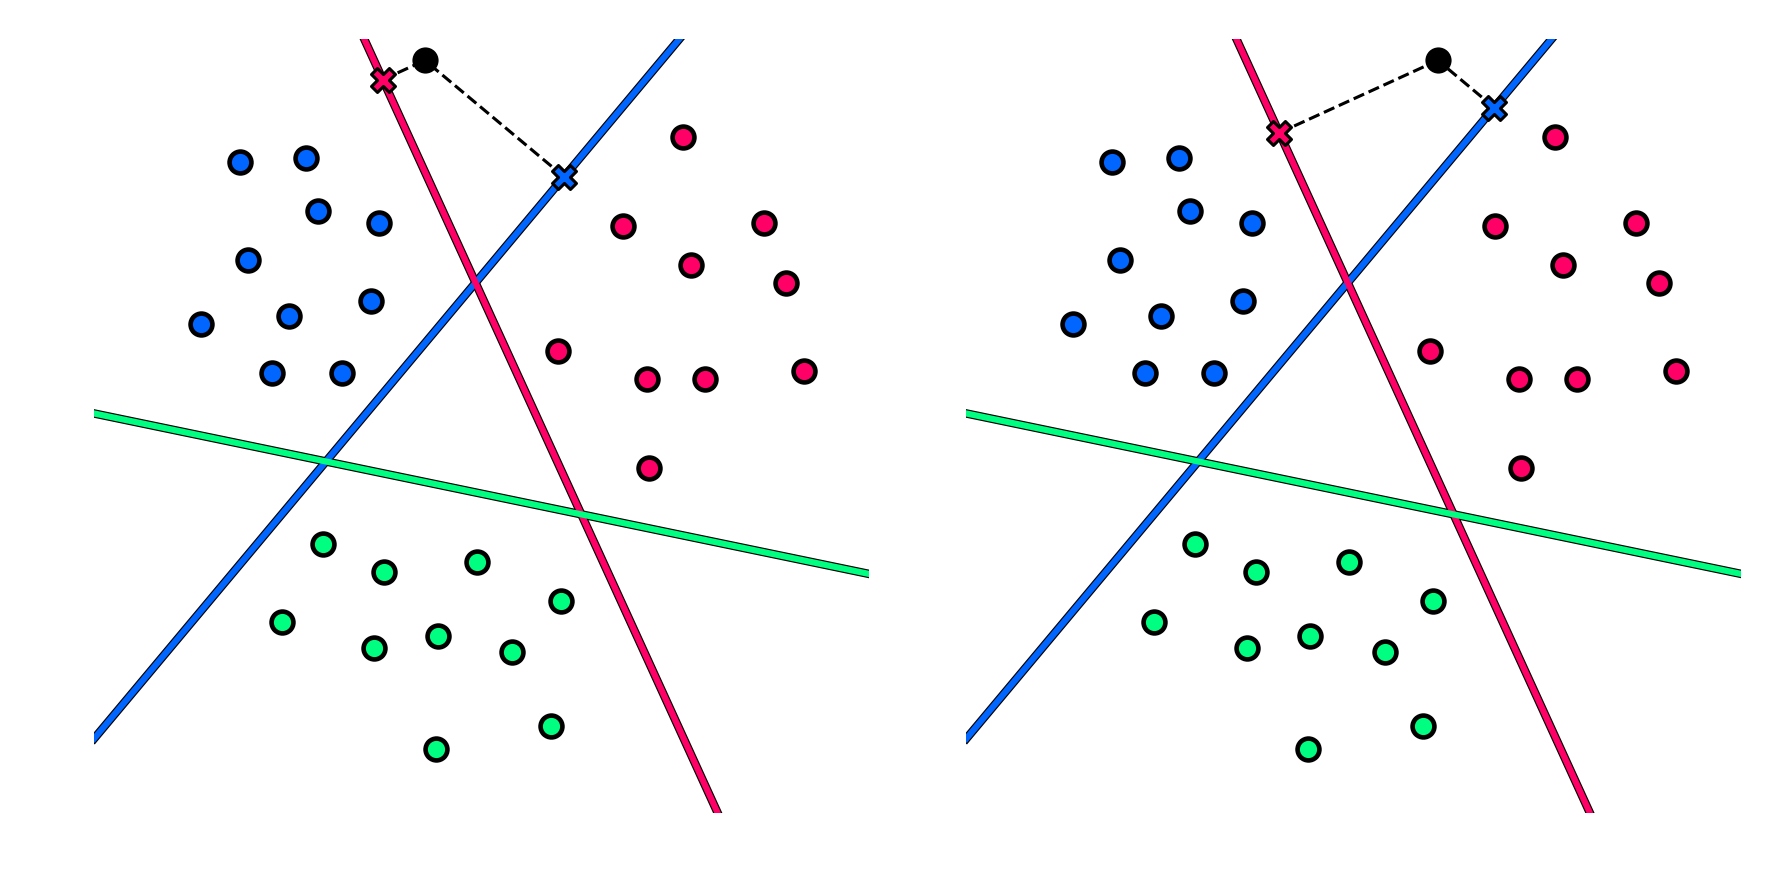</center>

# One vs Rest Binary Classifers - Negative Region

$$\mbf{w}_j^T\mbf{x}+b_j <0 \quad \forall j \in \{1,\ldots,K\}$$

$\mbf{x}$ is assigned to point with **lower** distance to the hyper-plane (because it the least unsure).
- Left case: blue class; Right case: green class

<br><br>
<center>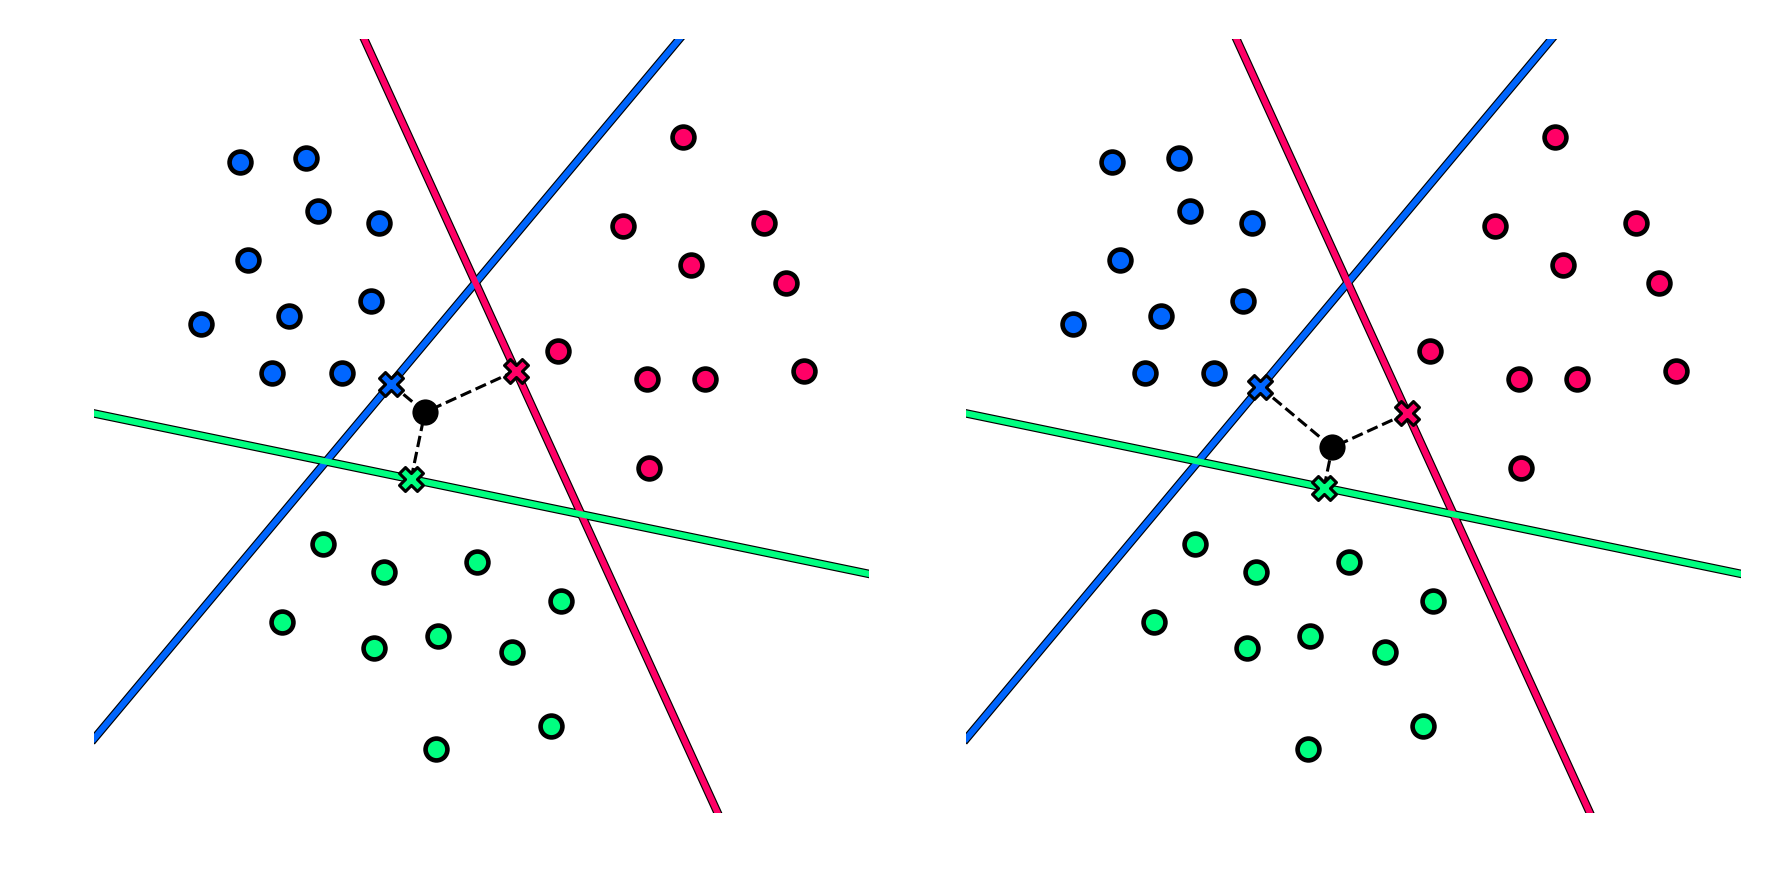</center>

# One vs Rest Binary Classifers - Negative Region

$$\mbf{w}_j^T\mbf{x}+b_j <0 \quad \forall j \in \{1,\ldots,K\}$$

$\mbf{x}$ is assigned to point with **lower** distance to the hyper-plane (because it the least unsure).
- Left case: blue class; Right case: green class

<br><br>
<center>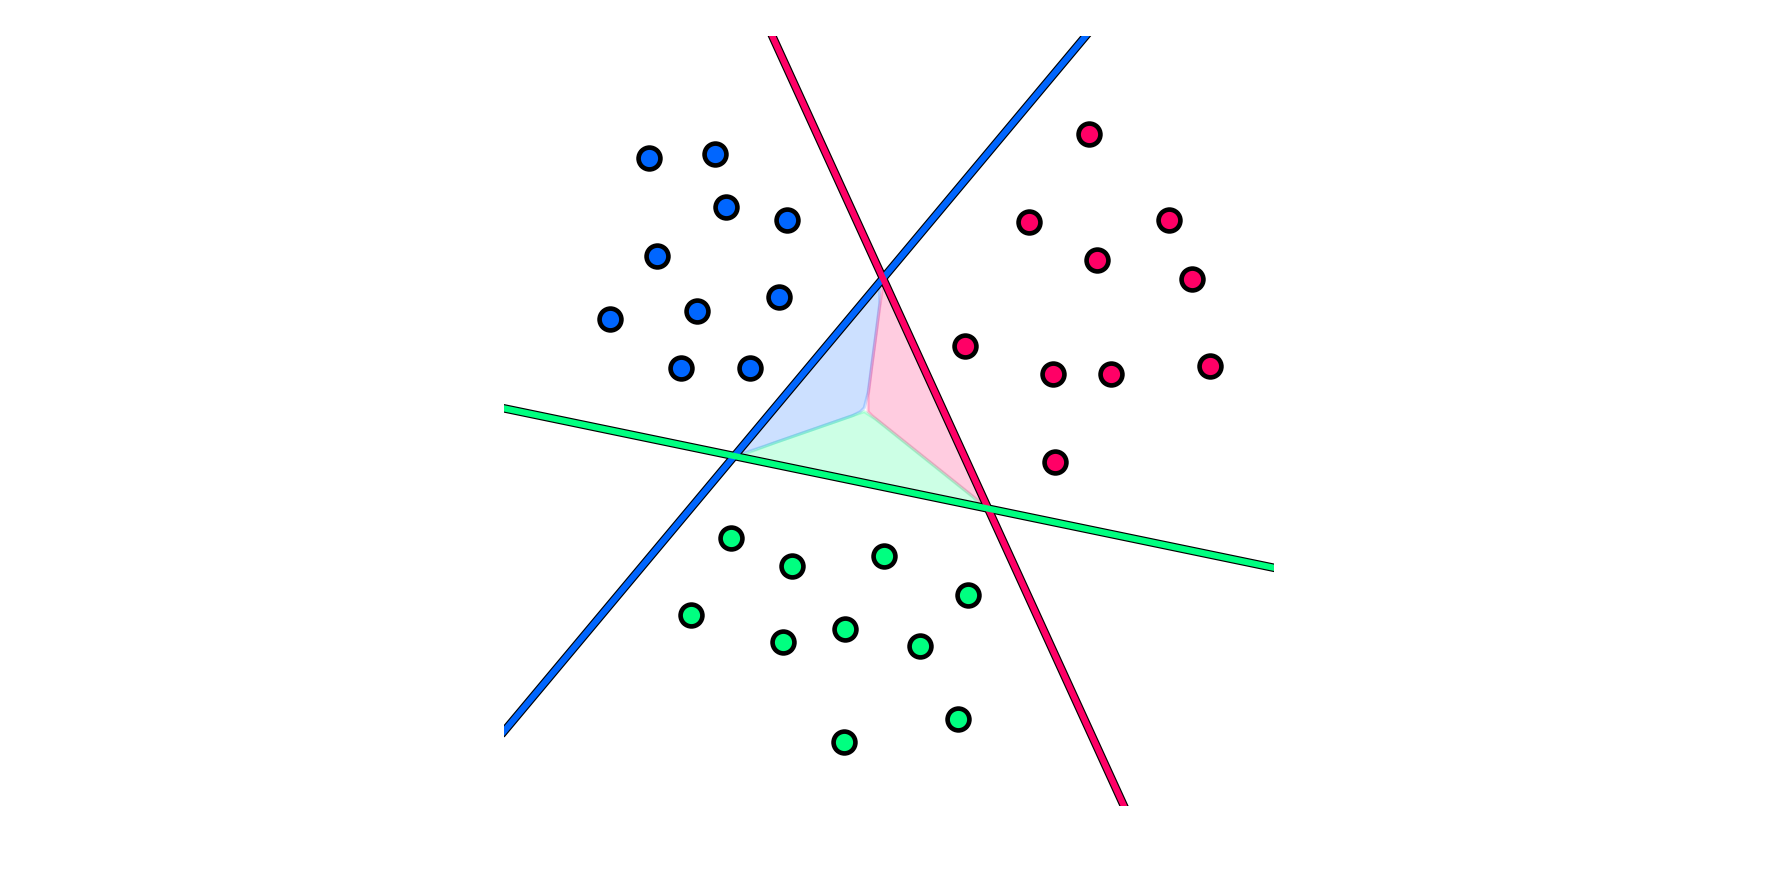</center>

# How do we go from left to right?
<br><br>
<center>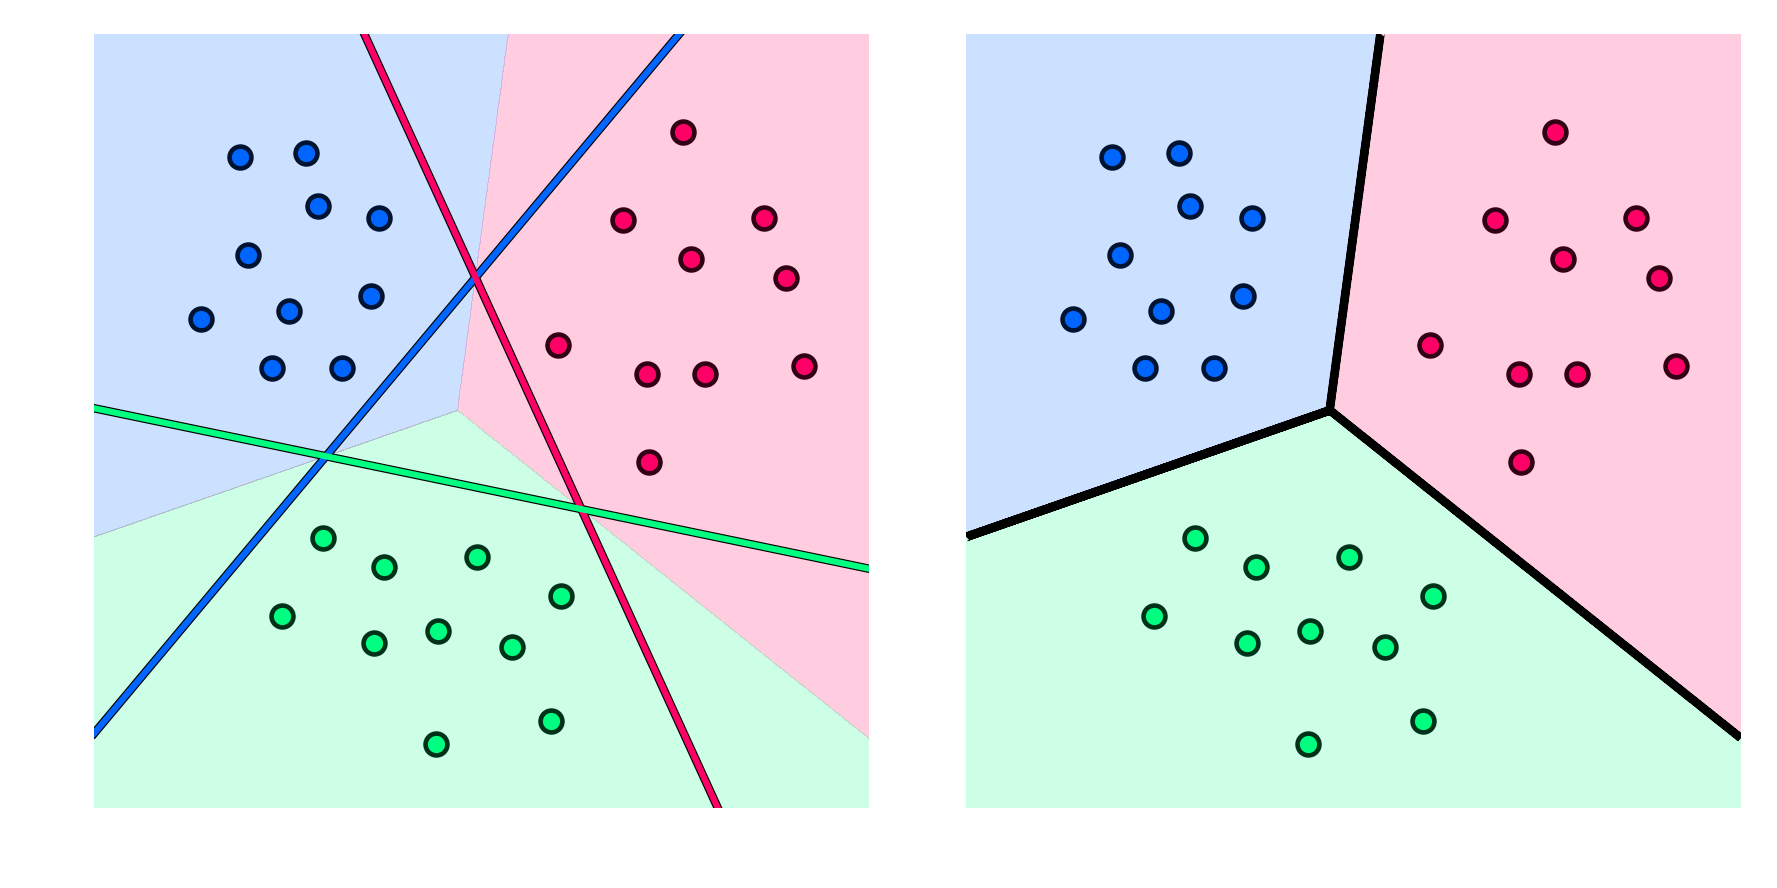</center>

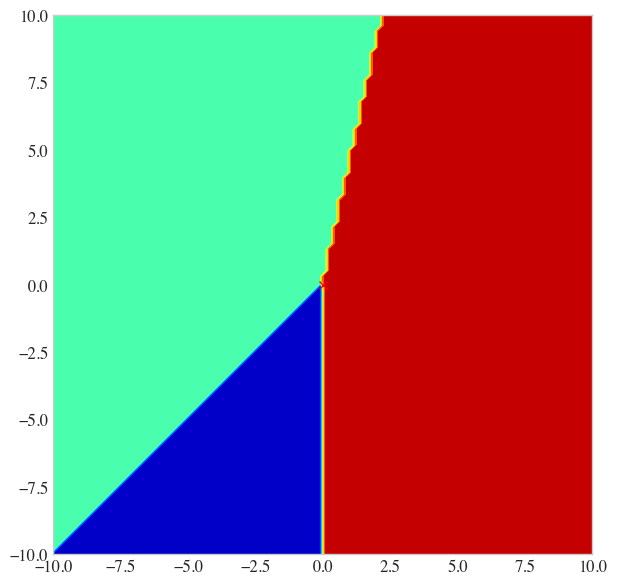

In [32]:
import numpy as np
ww = [[1, 2], [-1, 4], [8, 2]]
support = np.linspace(-10, 10, 100)
xx, yy = np.meshgrid(support, support)
W = np.array(ww)
dim = xx.shape
points = np.stack((xx.flatten(), yy.flatten()), axis=1)
dist = np.argmax((W@points.T), axis=0)
dist = dist.reshape(dim)
plt.figure(figsize=(7,7))
plt.contourf(xx, yy, dist, cmap='jet')
plt.plot(0, 0, 'rx')
plt.axis('scaled')
#plt.colorbar()
plt.xlim(-10, 10);

# Multi-Class Classification Example: CIFAR-10

<center><img src='figs/cifar10.png' width='70%'></center>

# From Binary to Multi-Class

**Binary case:**
$$
\operatorname{sign}\big(\mbf{w}^T\mbf{x}_i + b\big) > 0
$$

$$\operatorname{sign}(z)= \begin{cases} +1, & \mbox{if } z\ge0 \\ 
-1, & \mbox{if } z<0\end{cases}$$

let's consider the distance as:

We want:

$$ \begin{cases}
\mbf{w}^T\mbf{x} + b > 0 \quad y=+1\\
\mbf{w}^T\mbf{x} + b < 0 \quad y=-1\\
\end{cases} $$

# Multi-Class Decision Boundary

**Decision boundary $\{\mbf{w}_k,b_k\}_{k=1}^K$ per class** given K classes.

$$ \begin{align}
f_{\{\mbf{w}_1,b_1\}} = \mbf{w}_1^T\mbf{x} + b_1 \quad y=1\\
f_{\{\mbf{w}_2,b_2\}} = \mbf{w}_2^T\mbf{x} + b_2 \quad y=2\\
\cdots \\
f_{\{\mbf{w}_K,b_K\}} = \mbf{w}_K^T\mbf{x} + b_K \quad y=K\\
\end{align} $$

# Multi-Class Decision Boundary

**Decision boundary $\{\mbf{w}_k,b_k\}_{k=1}^K$ per class** given K classes.

A data point $\mbf{x}^{\star}$ is assigned to class $\hat{k}$ iff:

$$f_{\{\mbf{w}_\hat{k},b_\hat{k}\}}\big(\mbf{x}^{\star}\big)  > f_{\{\mbf{w}_j,b_j\}}\big(\mbf{x}^{\star}\big) \quad \forall j \in \{1,\ldots K\} \setminus\{\hat{k}\} $$


# Decision Boundary between 2 classes: $j~vs~k$

$$f_{\{\mbf{w}_{k},b_{k}\}}\big(\mbf{x}^{\star}\big) = f_{\{\mbf{w}_j,b_j\}}\big(\mbf{x}^{\star}\big)  $$

let's write it explicitly

$$ \mbf{w}_{k}^T\mbf{x} + b_{k} =  \mbf{w}_{j}^T\mbf{x} + b_{j}$$

$$ (\mbf{w}_{k}-\mbf{w}_{j})^T\mbf{x} + (b_{k}- b_{j}) =  0$$

This has the same form as the decision boundary for the two-class case discussed before.

# Decision Boundary Convexity

The decision regions of such a discriminant are always singly connected and convex.

Assuming $\mbf{x}_A$ and $\mbf{x}_B$ are in $\mathcal{R}_k$:

$$ \begin{align}
(\mbf{w}_{k}-\mbf{w}_{j})^T{\mbf{x}_A} + (b_{k}- b_{j}) >  0 \quad \forall j\neq k\\
(\mbf{w}_{k}-\mbf{w}_{j})^T{\mbf{x}_B} + (b_{k}- b_{j}) >  0 \quad \forall j\neq k\\
\end{align} $$

# Decision Boundary Convexity
and also _(definition of convexity)_: 
$$ \hat{\mbf{x}} = \lambda\mbf{x}_A + (1-\lambda)\mbf{x}_B ~~~\text{with}~~~~ 0 \le \lambda \le 1$$

Then also $\hat{\mbf{x}}$ is in $\mathcal{R}_k$, where $f_k(\cdot)$ is the hyper-plane:
$$ f_k(\hat{\mbf{x}}) >  f_j(\hat{\mbf{x}})\quad \forall j\neq k$$

<center><img src="figs/multi_class_convex.png" width='70%'/></center>

# Proof Sketch
We have to show that:
$$ f_k(\hat{\mbf{x}}) >  f_j(\hat{\mbf{x}})\quad \forall j\neq k$$

and we know that $f_k({\mbf{x}}_A) > f_j({\mbf{x}}_A)$ and $f_k({\mbf{x}_B})>f_j({\mbf{x}_B}) ~~\forall j\neq k$ holds.

We apply the definition and use linearity of hyper-plane (dot product):

$$ \hat{\mbf{x}} = \lambda\mbf{x}_A + (1-\lambda)\mbf{x}_B ~~~\text{with}~~~~ 0 \le \lambda \le 1$$

$$f_k(\hat{\mbf{x}})= f_k\Big( \lambda\mbf{x}_A + (1-\lambda)\mbf{x}_B\Big) = \lambda f_k( \mbf{x}_A) + (1-\lambda)f_k( \mbf{x}_B)$$

# Proof Sketch

Same hold for:
$$f_j(\hat{\mbf{x}})= f_k\Big( \lambda\mbf{x}_A + (1-\lambda)\mbf{x}_B\Big) = \lambda f_j( \mbf{x}_A) + (1-\lambda)f_j( \mbf{x}_B)$$

Now this holds by assumption $$ f_k({\mbf{x}}_A) > f_j({\mbf{x}}_A) \quad \forall j\neq k$$
given that $f_k({\mbf{x}_B})>f_j({\mbf{x}_B})$, it must be:

$$ f_k({\mbf{x}}_A) + f_k({\mbf{x}_B}) > f_j({\mbf{x}}_A) + f_j({\mbf{x}_B}) \quad \forall j\neq k$$

We have to prove:
$$f_k(\hat{\mbf{x}})= f_k\Big( \lambda\mbf{x}_A + (1-\lambda)\mbf{x}_B\Big) = \lambda f_k( \lambda\mbf{x}_A) + (1-\lambda)f_k( \lambda\mbf{x}_B)$$
We arrived here:
$$ f_k({\mbf{x}}_A) + f_k({\mbf{x}_B}) > f_j({\mbf{x}}_A) + f_j({\mbf{x}_B}) \quad \forall j\neq k$$

Remember $0 \le \lambda \le 1$ thus both $\lambda \ge 0$ and $(1-\lambda) \ge 0$, thus:
<br><br>
$$ \underbrace{\lambda f_k({\mbf{x}}_A) + (1-\lambda)f_k({\mbf{x}_B})}_{f_k(\hat{\mbf{x}})} > \underbrace{\lambda f_j({\mbf{x}}_A) + (1-\lambda)f_j({\mbf{x}_B})}_{f_j(\hat{\mbf{x}})} \quad \forall j\neq k$$


Thus convex linear combination  $\hat{\mbf{x}}$ still satisfy the same decision boundary:

$$f_k(\hat{\mbf{x}}) > f_j(\hat{\mbf{x}}) \quad \forall j\neq k$$

# Multi-Class: $\mbf{W}$, $\mbf{b}$. From a vector to a matrix

**Decision boundary $\{\mbf{w}_k,b_k\}_{k=1}^K$ per class** given K classes.

$$ \begin{align}
f_{\{\mbf{w}_1,b_1\}} = \mbf{w}_1^T\mbf{x} + b_1 \quad y=1\\
f_{\{\mbf{w}_2,b_2\}} = \mbf{w}_2^T\mbf{x} + b_2 \quad y=2\\
\cdots \\
f_{\{\mbf{w}_K,b_K\}} = \mbf{w}_K^T\mbf{x} + b_K \quad y=K\\
\end{align} $$

# Multi-Class: $\mbf{W}$, $\mbf{b}$. From a vector to a matrix

**Decision boundary $\{\mbf{w}_k,b_k\}_{k=1}^K$ per class** given K classes.

We can model directly everything with a matrix:

$$ \underbrace{\mbf{y}}_{\mathbb{R}^{Kx1}} = \underbrace{\mbf{W}}_{\mathbb{R}^{K\times d}}\underbrace{\mbf{x}}_{\mathbb{R}^{d\times1}} + \underbrace{\mbf{b}}_{\mathbb{R}^K}$$

# What if you want to classify $n$ points directly, not just one?

Will this work?

$$ \underbrace{\mbf{Y}}_{\mathbb{R}^{Kxn}} = \underbrace{\mbf{W}}_{\mathbb{R}^{K\times d}}\underbrace{\mbf{X}}_{\mathbb{R}^{d\times n}} + \underbrace{\mbf{b}}_{\mathbb{R}^K}$$

# What if you want to classify $n$ points directly, not just one?

OK there is broadcasting on $\mbf{b}$!

Can I just do 
```python
y = np.argmax(W@points.T, axis=0)
```
if I want to train a model?

$$\arg\max_{\mbf{W},\mbf{b}}\Big[\arg\max_k \big(\mbf{W}\mbf{X} + \mbf{b} \big)\Big]$$

# In other words: is `argmax` itself differentiable?

$$\nabla_{\mbf{W},\mbf{b}}\arg\max_k \big(\mbf{W}\mbf{X} + \mbf{b} \big)$$

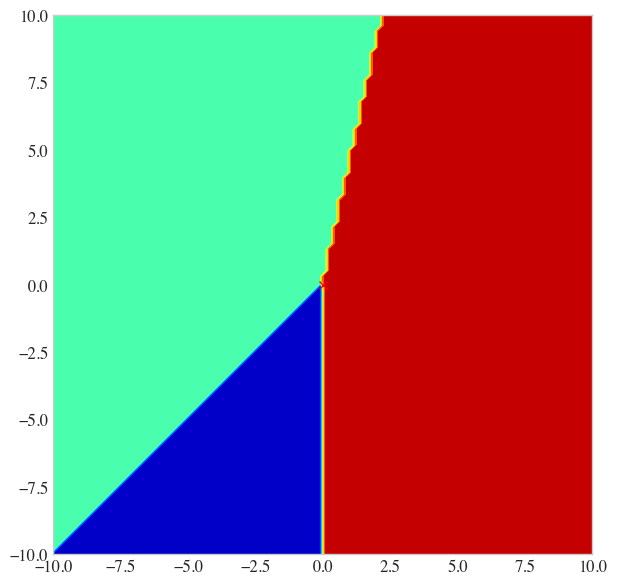

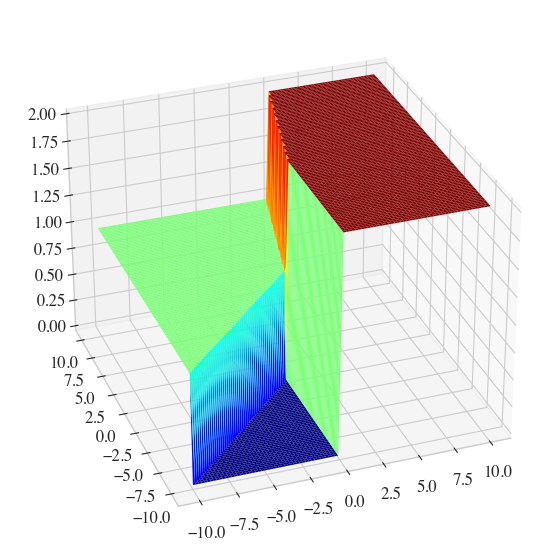

In [33]:
import numpy as np
from scipy.special import softmax
_softmax = False
ww = [[1, 2], [-1, 4], [8, 2]];support = np.linspace(-10, 10, 100)
xx, yy = np.meshgrid(support, support)
W = np.array(ww)
dim = xx.shape
points = np.stack((xx.flatten(), yy.flatten()), axis=1)
prob = np.argmax(W@points.T, axis=0) if not _softmax else np.max(np.tile(
    np.arange(0, 3).T, (points.shape[0], 1)).T*softmax(0.2*W@points.T, axis=0), axis=0)
prob = prob.reshape(dim)
plt.figure(figsize=(7, 7));
plt.contourf(xx, yy, prob, cmap='jet');plt.plot(0, 0, 'rx');plt.axis('scaled');plt.xlim(-10, 10);plt.figure(figsize=(7, 7));
ax = plt.axes(projection='3d');ax.plot_surface(xx, yy, prob,rstride=1, cstride=1,cmap='jet', edgecolor='none');ax.view_init(30, -110)

# In other words: is `argmax` itself differentiable? Nope!

## NO! we cannot get gradients from a step function with discontinuities
### The problem is not the discontinuities, the problem is that gradients are zero almost everywhere!

$$\nabla_{\mbf{W},\mbf{b}}\arg\max_k \big(\mbf{W}\mbf{X} + \mbf{b} \big)$$

# Are we doomed?

# We replace `argmax` with a smooth differentiable version called ~~Softargmax~~ SoftMax


> SoftMax is rather a smooth approximation to the arg max function: the function whose value is which index has the maximum, modeled as One-Hot Encoding


**Think Softmax as a differentiable selector!**

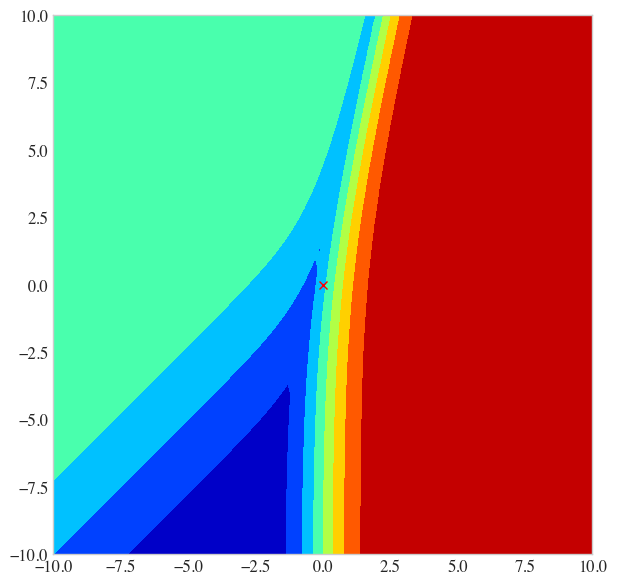

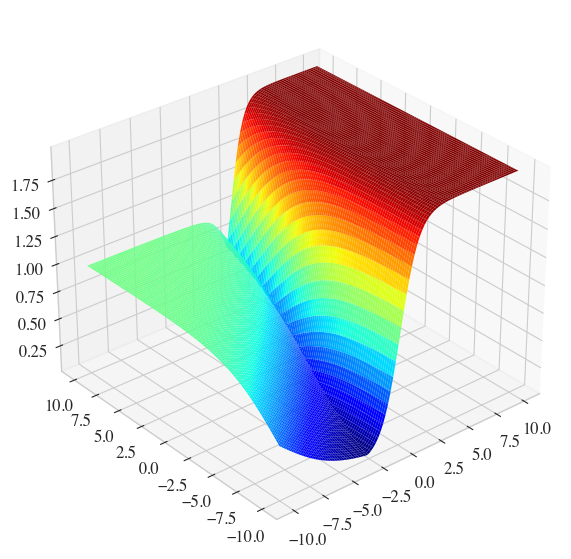

In [34]:
import numpy as np
from scipy.special import softmax
_softmax = True
ww = [[1, 2], [-1, 4], [8, 2]]
support = np.linspace(-10, 10, 100)
xx, yy = np.meshgrid(support, support)
W = np.array(ww)
dim = xx.shape
points = np.stack((xx.flatten(), yy.flatten()), axis=1)
prob = np.argmax(W@points.T, axis=0) if not _softmax else np.max(np.tile(
    np.arange(0, 3).T, (points.shape[0], 1)).T*softmax(0.2*W@points.T, axis=0), axis=0)
prob = prob.reshape(dim)
plt.figure(figsize=(7, 7))
plt.contourf(xx, yy, prob, cmap='jet')
plt.plot(0, 0, 'rx')
plt.axis('scaled')
# plt.colorbar()
plt.xlim(-10, 10);
plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, prob,rstride=1, cstride=1,
                cmap='jet', edgecolor='none')
ax.view_init(30, -130)

# Another example of non-differentiability of `argmax`

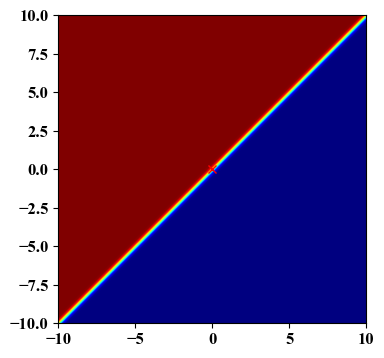

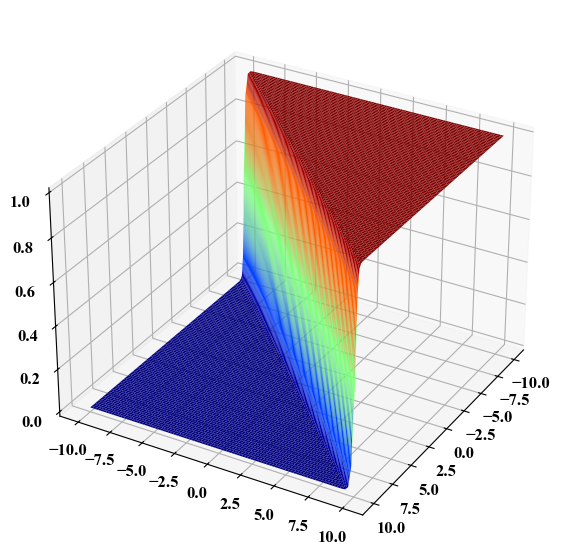

In [31]:
import numpy as np
from scipy.special import softmax
_softmax = True
temperature = 10
ww = [[1, 2], [-1, 4], [8, 2]]
support = np.linspace(-10, 10, 100)
xx, yy = np.meshgrid(support, support)
W = np.array(ww)
dim = xx.shape
points = np.stack((xx.flatten(), yy.flatten()), axis=1)
prob = np.argmax(points, axis=1) if not _softmax else np.max(np.tile(
    np.arange(0, 2).T, (points.shape[0], 1))*softmax(temperature*points, axis=1), axis=1)
prob = prob.reshape(dim)
plt.figure(figsize=(4, 4))
plt.contourf(xx, yy, prob, cmap='jet', levels=500)
plt.plot(0, 0, 'rx');plt.axis('scaled');plt.xlim(-10, 10);plt.figure(figsize=(7, 7));ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, prob,rstride=1, cstride=1,
                cmap='jet', edgecolor='none')
ax.view_init(30, 30)

# SoftMax Regression + Cross Entropy (CE) Loss = 
# Linear Classifier in Deep Learning = 
# Multinomial Logistic Regression

# SoftMax Regression

# SoftMax Regression

We model **conditional probability of $y|x$:**

$$ \begin{cases}
p(y=1| \mbf{x};\mbf{W},\mbf{b}) = p_1 = \bmf{\sigma}_1\left(  \mbf{W}\mbf{X} + \mbf{b} \right)\\
p(y=2| \mbf{x};\mbf{W},\mbf{b}) = p_2 =  \bmf{\sigma}_2\left(  \mbf{W}\mbf{X} + \mbf{b} \right)\\
\ldots \\
p(y=K| \mbf{x};\mbf{W},\mbf{b}) = p_K =  \bmf{\sigma}_K\left(  \mbf{W}\mbf{X} + \mbf{b} \right)\\
\end{cases} $$

<br><br>
$$f_{\boldsymbol{\theta}}(\mbf{x}) \doteq \bmf{\sigma}\left(  \mbf{W}\mbf{X} + \mbf{b} \right)$$

where:

$$ \bmf{\sigma}_i(z)= \frac{e^{z_i}}{\sum_{k=1}^K e^{z_k}} \quad \text{Softmax function}$$


# SoftMax Regression

<div align='center'>
    <img src="figs/softmax_prob.png">
</div>

# SoftMax Regression, More Compact Form


you can think $\mbf{z} = \mbf{W}\mbf{x}+\mbf{b}$ as **unormalized log-probability** of each class.

$$ p(\mbf{y}| \mbf{x};\mbf{W},\mbf{b}) = \frac{\exp({\mbf{W}\mbf{x}+\mbf{b})}}{\sum_{k=1}^K\exp({\mbf{W}_k\mbf{x}+\mbf{b}_k)}} $$




# SoftMax at Work


you can think $\mbf{z} = \mbf{W}\mbf{x}+\mbf{b}$ as **unormalized log-probability** of each class.


$$ p(\mbf{y}| \mbf{x};\mbf{W},\mbf{b}) = \frac{\exp({\mbf{W}\mbf{x}+\mbf{b})}}{\sum_{k=1}^K\exp({\mbf{W}_k\mbf{x}+\mbf{b}_k)}} $$


## Unormalized Log-Prob $z$

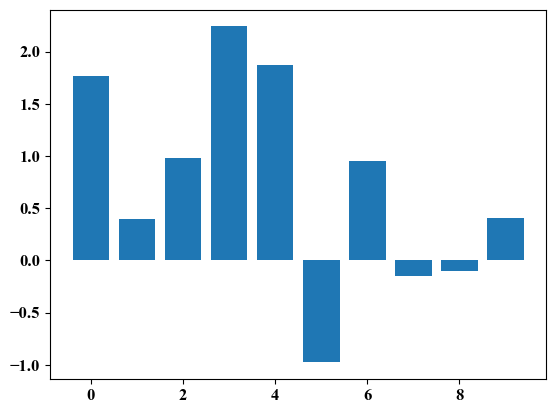

In [27]:
np.random.seed(0);z = np.random.randn(10);_=plt.bar(range(z.size),z)

## Softmax($z$)

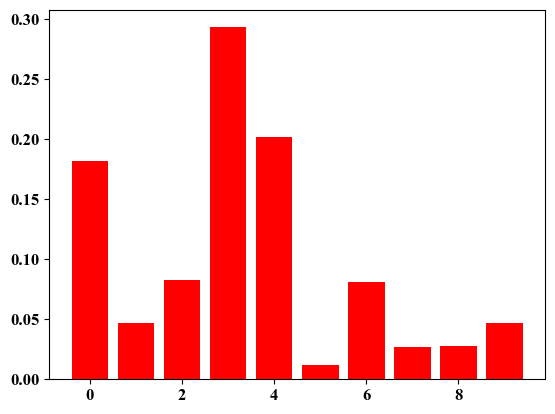

In [32]:
np.random.seed(0);z = np.random.randn(10);_=plt.bar(range(z.size),softmax(z),color='r')

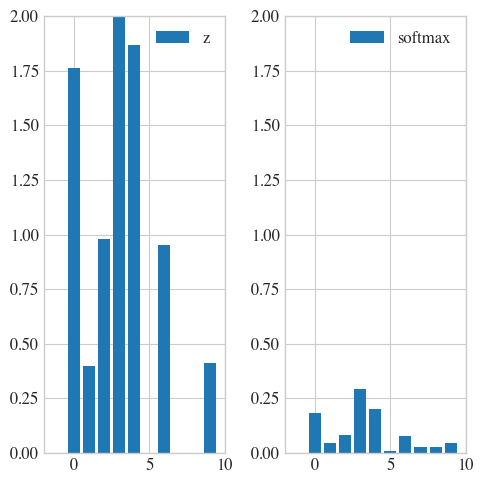

In [36]:
np.random.seed(0)
fig, axes = plt.subplots(1, 2, figsize=(5, 5))
z = np.random.randn(10)
axes[0].bar(range(z.size), z)
axes[1].bar(range(z.size), softmax(z))
# axes[0].axis('equal')
# axes[1].axis('equal')
axes[0].set(xlim=(-2,10), ylim=(0, 2))
axes[1].set(xlim=(-2,10), ylim=(0, 2))
axes[0].legend(['z'])
axes[1].legend(['softmax']);
fig.tight_layout()

# Cross-Entropy in function of $p$

$$
L(\mathcal{D}, W, \mathbf{b})=\frac{1}{|\mathcal{D}|} \sum_{(\mathbf{x}, y) \in \mathcal{D}} \underbrace{-\log \left(\frac{\exp \left(s_{y}\right)}{\sum_{k=1}^{C} \exp \left(s_{k}\right)}\right)}_{\text {cross-entropy loss for }(\mathbf{x}, y)}
$$


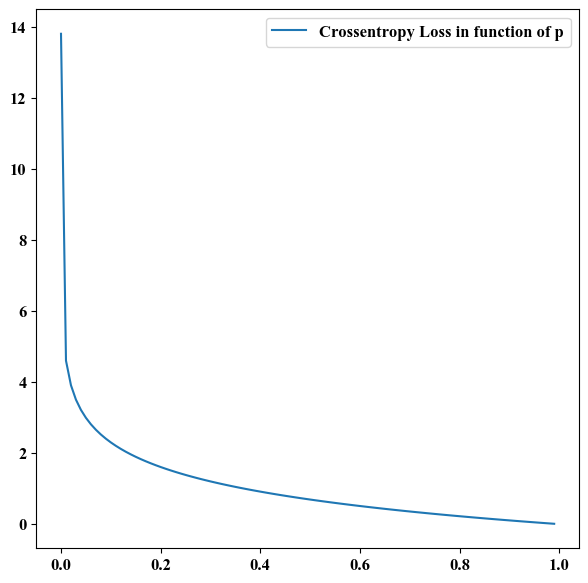

In [33]:
import numpy as np;import matplotlib.pyplot as plt;p = np.arange(1e-6, 1, 1e-2);y = -np.log(p);plt.figure(figsize=(7,7));plt.plot(p, y);_=plt.legend(['Crossentropy Loss in function of p'])

# Critical question:


Let's say that you have a model and you sample the weights $\mbf{W},\mbf{b}$ randomly from some distributions so that they **are non zero**. Also assume that the data $\mbf{x}$ is meaningful (non-zero).
> Can get you `nan` as $+\infty$ in the loss while you **start** training?
Or better, which is the value of the loss as soon as you start training?


- If non-zero, in the worst case, your classifier, for a $K$ class problem, it will perform **as bad as a random classifier (the weights are randomly generated)**.
- As such, probably your loss at the beginning of the training will simply be $\approx-\ln(\frac{1}{K})$ so it will **NOT** blow up to `nan` as $+\infty$.
- $-\ln(\frac{1}{10})\approx 2.3$ when start training.
- In CE we loss **natural log** because softmax exponentiates.

# Now we are doing Deep Learning...we just miss the "Deep"

<div align='center'>
    <img src="figs/pytorch_doc.png">
</div>

# SoftMax with K=2 is Sigmoid?

Yes, almost the same (up to save/wasted space)

$$ p(\mbf{y}| \mbf{x};\mbf{W},\mbf{b}) = \frac{\exp({\mbf{W}\mbf{x}+\mbf{b})}}{\sum_{k=1}^K\exp({\mbf{W}_k\mbf{x}+\mbf{b}_k)}} $$

Now $K=2$ and define $\mbf{z} \doteq \mbf{W}\mbf{x} + \mbf{b}$:


$$ p(\mbf{y}=1| \mbf{x};\mbf{W},\mbf{b}) = \frac{\exp(\mbf{z}_1)}{\sum_{k=1}^K\exp(\mbf{z}_k)} =   \frac{\exp(\mbf{z}_1)}{\exp(\mbf{z}_1) + \exp(\mbf{z}_2)} $$

$$ p(\mbf{y}=1| \mbf{x};\mbf{W},\mbf{b}) = \frac{\exp(\mbf{z}_1)\cdot}{\sum_{k=1}^K\exp(\mbf{z}_k)} =   \frac{\exp(\mbf{z}_1)\cdot\exp(-\mbf{z}_1)}{[\exp(\mbf{z}_1) + \exp(\mbf{z}_2)]\cdot\exp(-\mbf{z}_1)} = \frac{1}{1+\exp(\mbf{z}_2-\mbf{z}_1)}$$

$$ p(\mbf{y}=1| \mbf{x};\mbf{W},\mbf{b}) = \frac{1}{1+\exp(-(\mbf{z}_1-\mbf{z}_2))} = \sigma(\mbf{\mbf{y}})~~\text{where}~~\mbf{y} = \mbf{z}_1-\mbf{z}_2$$

Yes it is the same but with sigmoid you spare a vector since $\mbf{W}$ becomes a single vector $\mbf{w}$ not a matrix! 

We can avoid modeling the other class since $ p(\mbf{y}=0| \mbf{x};\mbf{W},\mbf{b})=1- p(\mbf{y}=1| \mbf{x};\mbf{W},\mbf{b})$

# Geometry of the Feature Space of Learned by SoftMax + CE



# 2D Feature Space Learned with SoftMax + CE


<center><img src="figs/cifar10_boundary.png" width='70%'/></center>

# 3D Feature Space Learned with SoftMax + CE

<center><img src=figs/3dsoftmax.png width='40%'/></center>

# From the research side: decreasing intra-class variabiliy is a good idea


<center><img src=figs/marginsoftmax.png width='80%'/></center>


# Each $\mbf{W}_k$ works as a "prototype" of each class

- Learn $\mbf{W}, \mbf{b}$ to classify the images in a dataset e.g. CIFAR-10
- Can interpret each row, $\mbf{W}_k$ of  $\mbf{W}$ as a **template/prototype** for class $k$
- Below is the visualization of each learnt $\mbf{W}_k$ for CIFAR-10
- Parallelism between $\bmf{\mu}_k$ learned by K-means and $\mbf{W}_k$ now but now there is supervision!

<center><img src=figs/prototype.png width='70%'/></center>

# Let's see visually the classification

<center><img src=figs/softmax_procedure.png width='60%'>

# Can you compute the loss value?

<center><img src=figs/softmax_table.png width='60%'/></center>

# Damn, until now is all linear. So now the "Deep"!

- Damn, until now is all linear.
- Our **beloved SoftMax+CE linear layer** is there **in the end (classifier).**


<center><img src=https://www.datasciencecentral.com/wp-content/uploads/2021/10/1-19.png width='70%'/></center>

# Neural Net as a Computational Graph that implements Backprop

<div align='center'>
    <img src="figs/comput_grad.png" width='50%'>
</div>